# Evaluation Project - 8: Flight Price Prediction

### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

#### Size of training set: 10683 records

#### Size of test set: 2671 records

#### FEATURES:
- __Airline:__ The name of the airline.

- __Date_of_Journey:__ The date of the journey

- __Source:__ The source from which the service begins.

- __Destination:__ The destination where the service ends.

- __Route:__ The route taken by the flight to reach the destination.

- __Dep_Time:__ The time when the journey starts from the source.

- __Arrival_Time:__ Time of arrival at the destination.

- __Duration:__ Total duration of the flight.

- __Total_Stops:__ Total stops between the source and destination.

- __Additional_Info:__ Additional information about the flight


#### Target Column:
- __Price:__ The price of the ticket

 


- predict the price of the flight ticket. 

 

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor,Ridge, Lasso
from sklearn.metrics import roc_curve, auc, roc_auc_score, r2_score,classification_report, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import pickle
import warnings
warnings.filterwarnings('ignore')

## Importing the DATASET

In [2]:
flight_train=pd.read_excel("Data_Train.xlsx")

In [3]:
flight_test=pd.read_excel("Test_set.xlsx")

### Checking Top 5 rows Data

In [4]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# EDA

## Checking Total Numbers of Rows and Column

In [6]:
flight_train.shape

(10683, 11)

In [7]:
flight_test.shape

(2671, 10)

## Checking All Column Names

In [8]:
flight_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
flight_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

## Checking Data Type of All Data

In [10]:
flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
flight_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

## Checking for Null Values

In [12]:
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

###### We can see there is Null Value present in column: 

    Route and Total_Stops

In [13]:
flight_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

###### There is no null value present.

### Checking for Null Values through heatmap also

<AxesSubplot:>

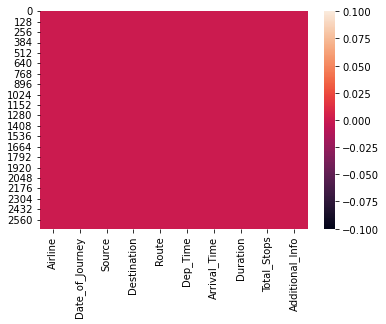

In [14]:
sns.heatmap(flight_test.isnull())

We can see here also that there is no Null Values present in our dataset.

## Information about Data (Memory Used and Data Types)

In [15]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [16]:
flight_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### Checking for ? values if present in our dataset or not

In [17]:
(flight_train==' ?').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [18]:
(flight_train=='?').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [19]:
(flight_train=='? ').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [20]:
(flight_test==' ?').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [21]:
(flight_test=='?').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [22]:
(flight_test=='? ').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

###### We can see there are no ? values present in our dataset

### Checking whether the dataset contains any space

In [23]:
flight_train[flight_train['Price'] == '']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


So we can see there are no spaces present in the dataset.

### Checking for blank value in our Target Column

In [24]:
flight_train[flight_train['Price'] == ''].index

Int64Index([], dtype='int64')

So, we can check there are no blank value present in our Target Column

### Checking values of Target Variable.

In [25]:
flight_train['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

### Checking unique values present in the Target Variable.

In [26]:
flight_train['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [27]:
flight_train['Price'].nunique()

1870

### Checking unique elements of each columns

In [28]:
flight_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [29]:
flight_test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

# Descriptive Statistics

In [30]:
# Description of flight_train Dataset : works only on continuous column 
flight_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


- So, we can see that only one column is containing continuous data and rest 10 column contains categorical data.

### Checking Description through heatmap also.

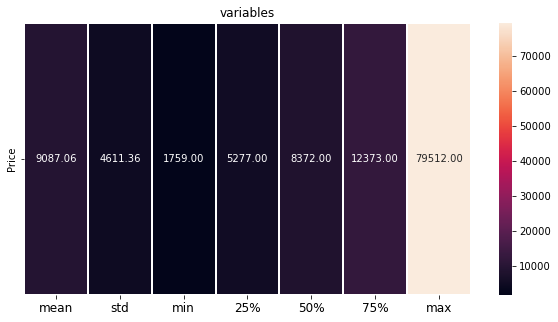

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(round(flight_train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

#### Observation of Describe of Datasets:
- The summary of this dataset looks good as there are no negative/ invalid value present.
- We can see the counts of "Price" columns are 10683.000000 which means no null values are present.
- Total No of Rows: 10683 and Total No. of Columns: 11
- Only one column contains Continuous Data that is "Price".
- We are determining Mean, Standard Deviation, Minimum and Maximum Values of each column.

1. Price:
- Mean= 9087.064121,
- std= 4611.359167,
- Min= 1759.000000,
- Max= 79512.000000

#### In flight_test Dataset there are no continuous column so Statistics Description will not work on it.

## Data Cleaning and preprocessing of flight_train dataset

Since there are Null values in the dataset, so we need to treat them.

In [32]:
# drop missing values rows
flight_train.dropna(inplace = True)

In [33]:
# checking again null values
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### Date_of_Journey is an object data type, So, we need to convert this data type to a datetime data type for prediction.

In [34]:
flight_train['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [35]:
#converting datatype from object to datetime 
flight_train['Date_of_Journey']=pd.to_datetime(flight_train['Date_of_Journey'])

#### Extracting Month_of_Journey and Day_of_Journey from Date_of_Journey

In [36]:
#mapping Month values from 'Date_of_Journey' to 'Month_of_Journey' column in main dataframe
flight_train['Month_of_Journey']=flight_train['Date_of_Journey'].apply(lambda m:m.month)

In [37]:
#mapping Day values from 'Date_of_Journey' to 'Day_of_Journey' column in main dataframe
flight_train['Day_of_Journey']=flight_train['Date_of_Journey'].apply(lambda d:d.day)

#### Droping column "Date_of_Journey" after extracting Day and Month

In [38]:
flight_train.drop(columns=['Date_of_Journey'],inplace=True)

In [39]:
flight_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#### Extracting Dep_Hour and Dep_Minute from Dep_Time

In [40]:
# Extracting Hours
flight_train["Dep_Hour"] = pd.to_datetime(flight_train["Dep_Time"]).dt.hour

In [41]:
# Extracting Minutes
flight_train["Dep_Minute"] = pd.to_datetime(flight_train["Dep_Time"]).dt.minute

#### Droping Dep_Time after extraction

In [42]:
flight_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [43]:
flight_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


#### Extracting Arrival_Hour and Arrival_Minute from Arrival_Time

In [44]:
# Extracting Hours
flight_train["Arrival_Hour"] = pd.to_datetime(flight_train["Arrival_Time"]).dt.hour

In [45]:
# Extracting Minutes
flight_train["Arrival_Minute"] = pd.to_datetime(flight_train["Arrival_Time"]).dt.minute

#### Droping Arrival_Time after extraction

In [46]:
flight_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [47]:
flight_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Converting and  Extracting Duration column into list

In [48]:
# Time taken by plane to reach destination is called Duration (Duration= Departure Time - Arrival time).
duration = list(flight_train["Duration"])

for i in range(len(duration)):
    # Checking if duration contains only hour or minutes
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            # Adding 0 Minutes
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adding 0 Hours
            duration[i] = "0h " + duration[i]

Duration_Hours = []
Duration_Minutes = []
for i in range(len(duration)):
    # Extracting hours from duration
    Duration_Hours.append(int(duration[i].split(sep = "h")[0]))    
     # Extracting minutes from duration
    Duration_Minutes.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
# Adding Duration_Hours and Duration_Minutes list to flight_train Dataset

flight_train["Duration_Hours"] = Duration_Hours
flight_train["Duration_Minutes"] = Duration_Minutes

#### Droping Duration column after extraction

In [49]:
flight_train.drop(["Duration"], axis = 1, inplace = True)

In [50]:
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [51]:
#Checking again Data Types
flight_train.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price                int64
Month_of_Journey     int64
Day_of_Journey       int64
Dep_Hour             int64
Dep_Minute           int64
Arrival_Hour         int64
Arrival_Minute       int64
Duration_Hours       int64
Duration_Minutes     int64
dtype: object

In [52]:
#checking again all column names
flight_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

In [53]:
#Checking again total Rows and Columns
flight_train.shape

(10682, 15)

## Data Cleaning and preprocessing of flight_test dataset

#### Date_of_Journey is an object data type, So, we need to convert this data type to a datetime data type for prediction.

In [54]:
flight_test['Date_of_Journey'].value_counts()

9/05/2019     144
12/06/2019    135
18/05/2019    129
6/06/2019     127
9/06/2019     119
21/05/2019    118
15/05/2019    106
15/06/2019    105
6/03/2019      97
21/03/2019     93
3/06/2019      92
1/06/2019      88
24/06/2019     85
1/04/2019      78
24/03/2019     78
27/06/2019     75
6/05/2019      73
24/05/2019     71
12/05/2019     68
27/05/2019     65
27/03/2019     65
1/05/2019      62
3/03/2019      62
9/03/2019      55
12/03/2019     43
18/03/2019     41
01/03/2019     34
15/03/2019     33
06/03/2019     28
3/04/2019      28
3/05/2019      27
03/03/2019     26
9/04/2019      24
21/06/2019     24
15/04/2019     23
18/06/2019     22
21/04/2019     22
09/03/2019     21
24/04/2019     21
27/04/2019     15
6/04/2019      14
18/04/2019     12
1/03/2019      12
12/04/2019     11
Name: Date_of_Journey, dtype: int64

In [55]:
#converting datatype from object to datetime 
flight_test['Date_of_Journey']=pd.to_datetime(flight_test['Date_of_Journey'])

### Extracting Month_of_Journey and Day_of_Journey from Date_of_Journey

In [56]:
#mapping Month values from 'Date_of_Journey' to 'Month_of_Journey' column in main dataframe
flight_test['Month_of_Journey']=flight_test['Date_of_Journey'].apply(lambda m:m.month)

#mapping Day values from 'Date_of_Journey' to 'Day_of_Journey' column in main dataframe
flight_test['Day_of_Journey']=flight_test['Date_of_Journey'].apply(lambda d:d.day)

#### Droping column "Date_of_Journey" after extracting Day and Month

In [57]:
flight_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

### Extracting Dep_Hour and Dep_Minute from Dep_Time

In [58]:
# Extracting Hours
flight_test["Dep_Hour"] = pd.to_datetime(flight_test["Dep_Time"]).dt.hour

# Extracting Minutes
flight_test["Dep_Minute"] = pd.to_datetime(flight_test["Dep_Time"]).dt.minute

#### Droping Dep_Time after extraction

In [59]:
flight_test.drop(["Dep_Time"], axis = 1, inplace = True)

### Extracting Arrival_Hour and Arrival_Minute from Arrival_Time

In [60]:
# Extracting Hours
flight_test["Arrival_Hour"] = pd.to_datetime(flight_test["Arrival_Time"]).dt.hour

# Extracting Minutes
flight_test["Arrival_Minute"] = pd.to_datetime(flight_test["Arrival_Time"]).dt.minute

#### Droping Arrival_Time after extraction

In [61]:
flight_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [62]:
flight_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,6,24,23,55,2,45


### Converting and Extracting Duration column into list

In [63]:
# Time taken by plane to reach destination is called Duration (Duration= Departure Time - Arrival time).
duration = list(flight_test["Duration"])

for i in range(len(duration)):
    # Checking if duration contains only hour or minutes
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            # Adding 0 Minutes
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adding 0 Hours
            duration[i] = "0h " + duration[i]

Duration_Hours = []
Duration_Minutes = []
for i in range(len(duration)):
    # Extracting hours from duration
    Duration_Hours.append(int(duration[i].split(sep = "h")[0]))    
     # Extracting minutes from duration
    Duration_Minutes.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
# Adding Duration_Hours and Duration_Minutes list to flight_train Dataset

flight_test["Duration_Hours"] = Duration_Hours
flight_test["Duration_Minutes"] = Duration_Minutes

#### Droping Duration column after extraction

In [64]:
flight_test.drop(["Duration"], axis = 1, inplace = True)

In [65]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,23,55,2,45,2,50


In [66]:
#Checking again Data Types
flight_test.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Month_of_Journey     int64
Day_of_Journey       int64
Dep_Hour             int64
Dep_Minute           int64
Arrival_Hour         int64
Arrival_Minute       int64
Duration_Hours       int64
Duration_Minutes     int64
dtype: object

In [67]:
#checking again all column names
flight_test.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [68]:
#Checking again total Rows and Columns
flight_test.shape

(2671, 14)

# Data Visualization
## Univariate Analysis

### Using Countplot for categorical columns for flight_train Dataset

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

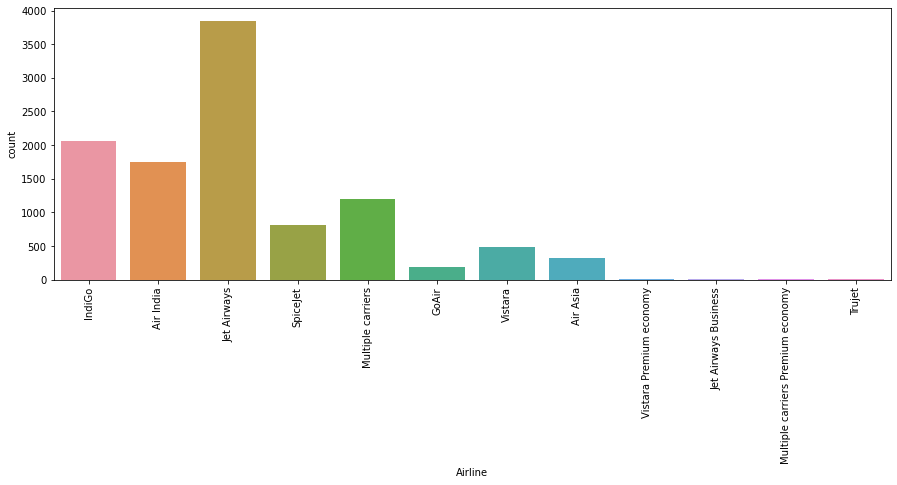

In [69]:
#Count Plot for "Airline" column
print(flight_train["Airline"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Airline",data=flight_train)
plt.xticks(rotation=90)

- Jet Airways have highest Airline (Total No= 3849)
- Trujet has least Airline (Total No= 1)

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


<AxesSubplot:xlabel='Source', ylabel='count'>

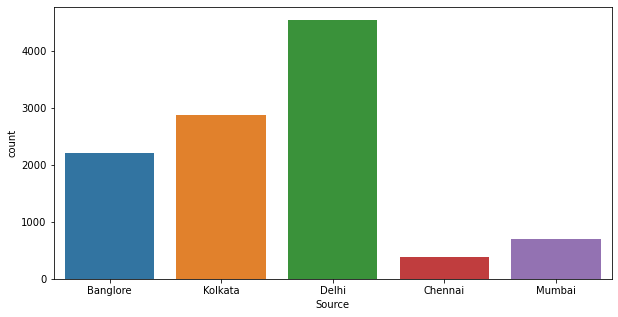

In [70]:
#Count Plot for "Source" column
print(flight_train["Source"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot("Source",data=flight_train)

- Delhi is highest source station of Flights.
- Chennai is least source station of Flights.

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

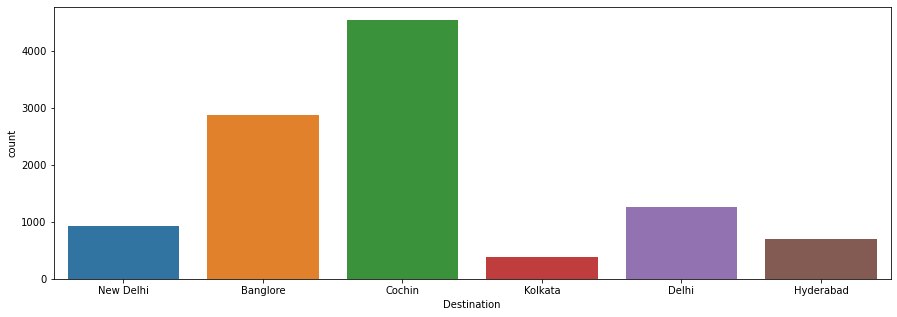

In [71]:
#Count Plot for "Destination" column
print(flight_train["Destination"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Destination",data=flight_train)

- Cochin is highest Destination station of Flights.
- Kolkata is least Destination station of Flights.

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Route'>

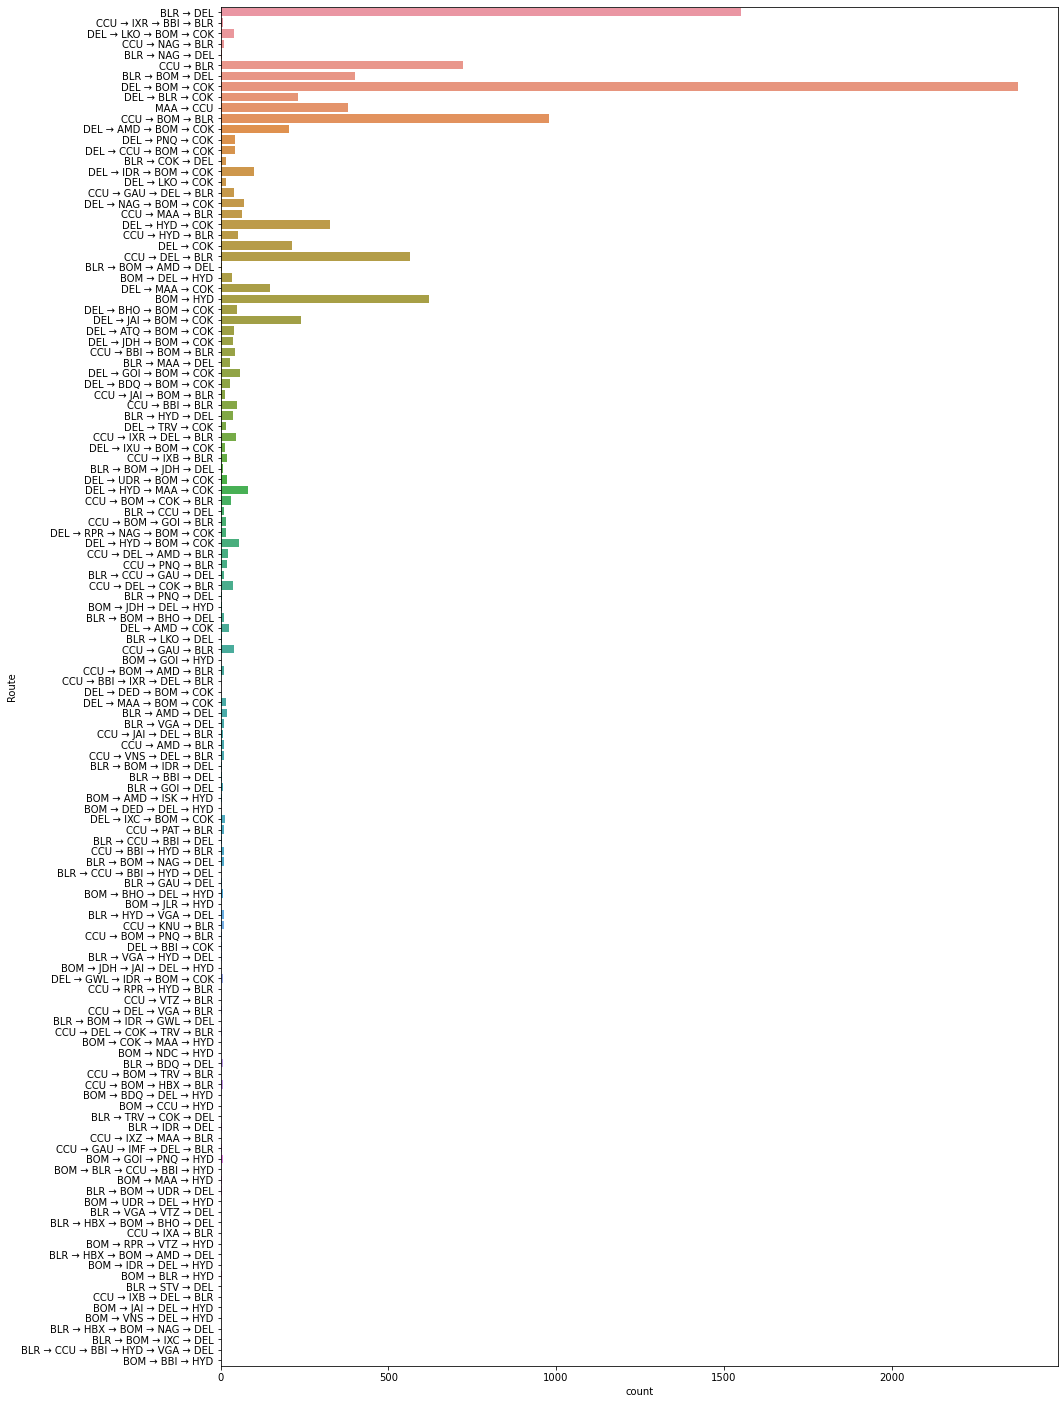

In [72]:
#Count Plot for "Route" column
print(flight_train["Route"].value_counts())
plt.figure(figsize=(15,25))
sns.countplot(y= "Route",data=flight_train)

- Route DEL → BOM → COK is the highest route taken by the flight to reach the destination from source and Second Highest route is BLR → DEL 

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

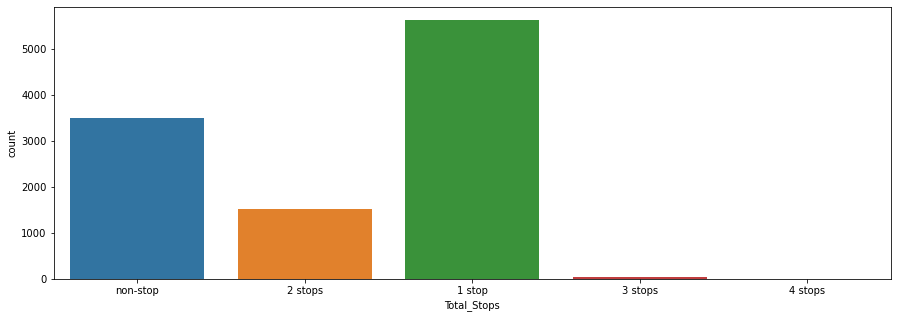

In [73]:
#Count Plot for "Total_Stops" column
print(flight_train["Total_Stops"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Total_Stops",data=flight_train)

1 stop is highest and 4 stops is least as flight stops

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

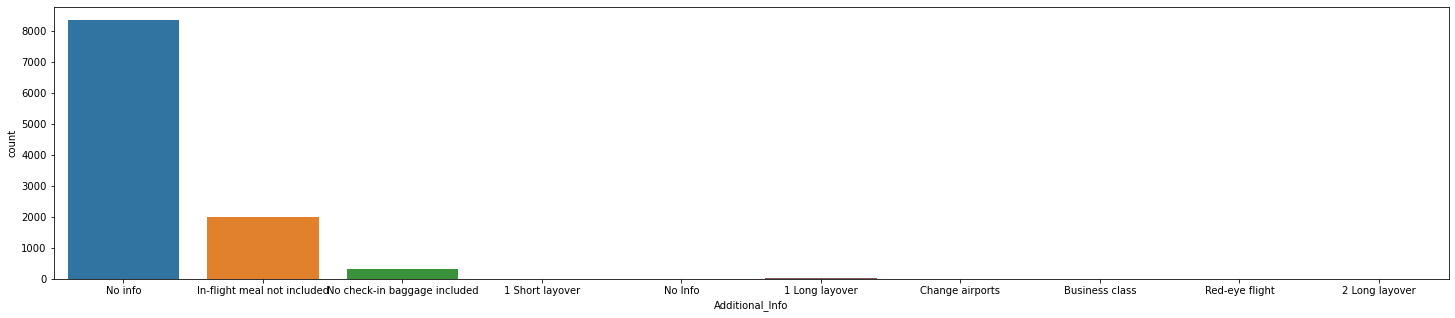

In [74]:
#Count Plot for "Additional_Info" column
print(flight_train["Additional_Info"].value_counts())
plt.figure(figsize=(25,5))
sns.countplot("Additional_Info",data=flight_train)

- We can see in Dataset No info and No Info both are available which means same. So we will combine them.
- In Additional_Info, No Info is highest. So in most flights Additional_Info are not available but in some flights Additional_Info are available they are:
    - In-flight meal not included
    - No check-in baggage included
    - 1 Long layover
    - Change airports
    - Business class
    - 1 Short layover
    - Red-eye flight
    - 2 Long layover

### Using Countplot for categorical columns for flight_test Dataset

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


<AxesSubplot:xlabel='Airline', ylabel='count'>

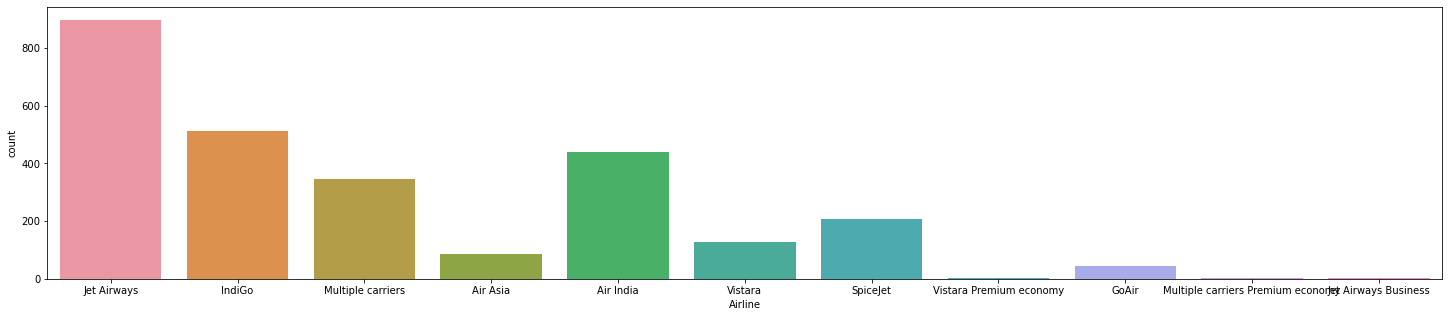

In [75]:
#Count Plot for "Airline" column
print(flight_test["Airline"].value_counts())
plt.figure(figsize=(25,5))
sns.countplot("Airline",data=flight_test)

Jet Airways have highest Airline

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


<AxesSubplot:xlabel='Source', ylabel='count'>

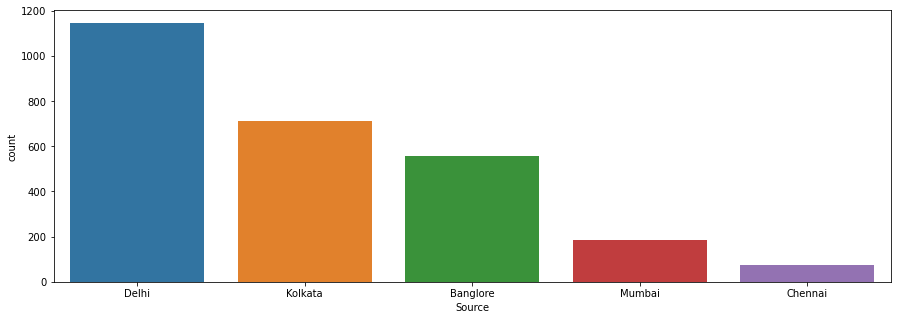

In [76]:
#Count Plot for "SourceSource" column
print(flight_test["Source"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Source",data=flight_test)

Delhi is used highest as source Station of Flights

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


<AxesSubplot:xlabel='Destination', ylabel='count'>

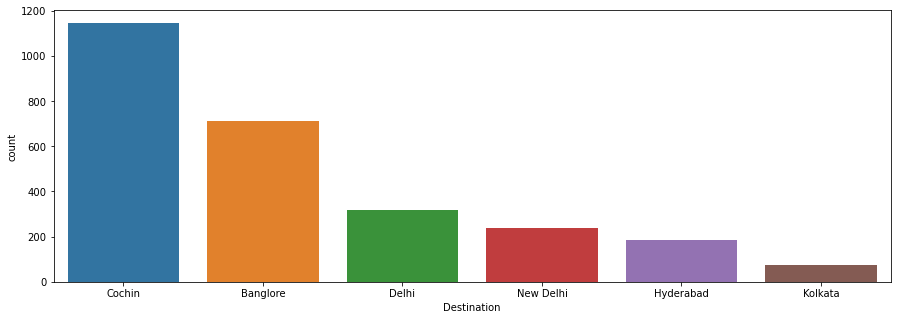

In [77]:
#Count Plot for "Destination" column
print(flight_test["Destination"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Destination",data=flight_test)

Cochin is Highest Destination Station of Flights

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BLR → BOM → IDR → GWL → DEL      1
BLR → GOI → DEL                  1
CCU → PAT → BLR                  1
BLR → VGA → DEL                  1
BOM → GOI → PNQ → HYD            1
Name: Route, Length: 100, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Route'>

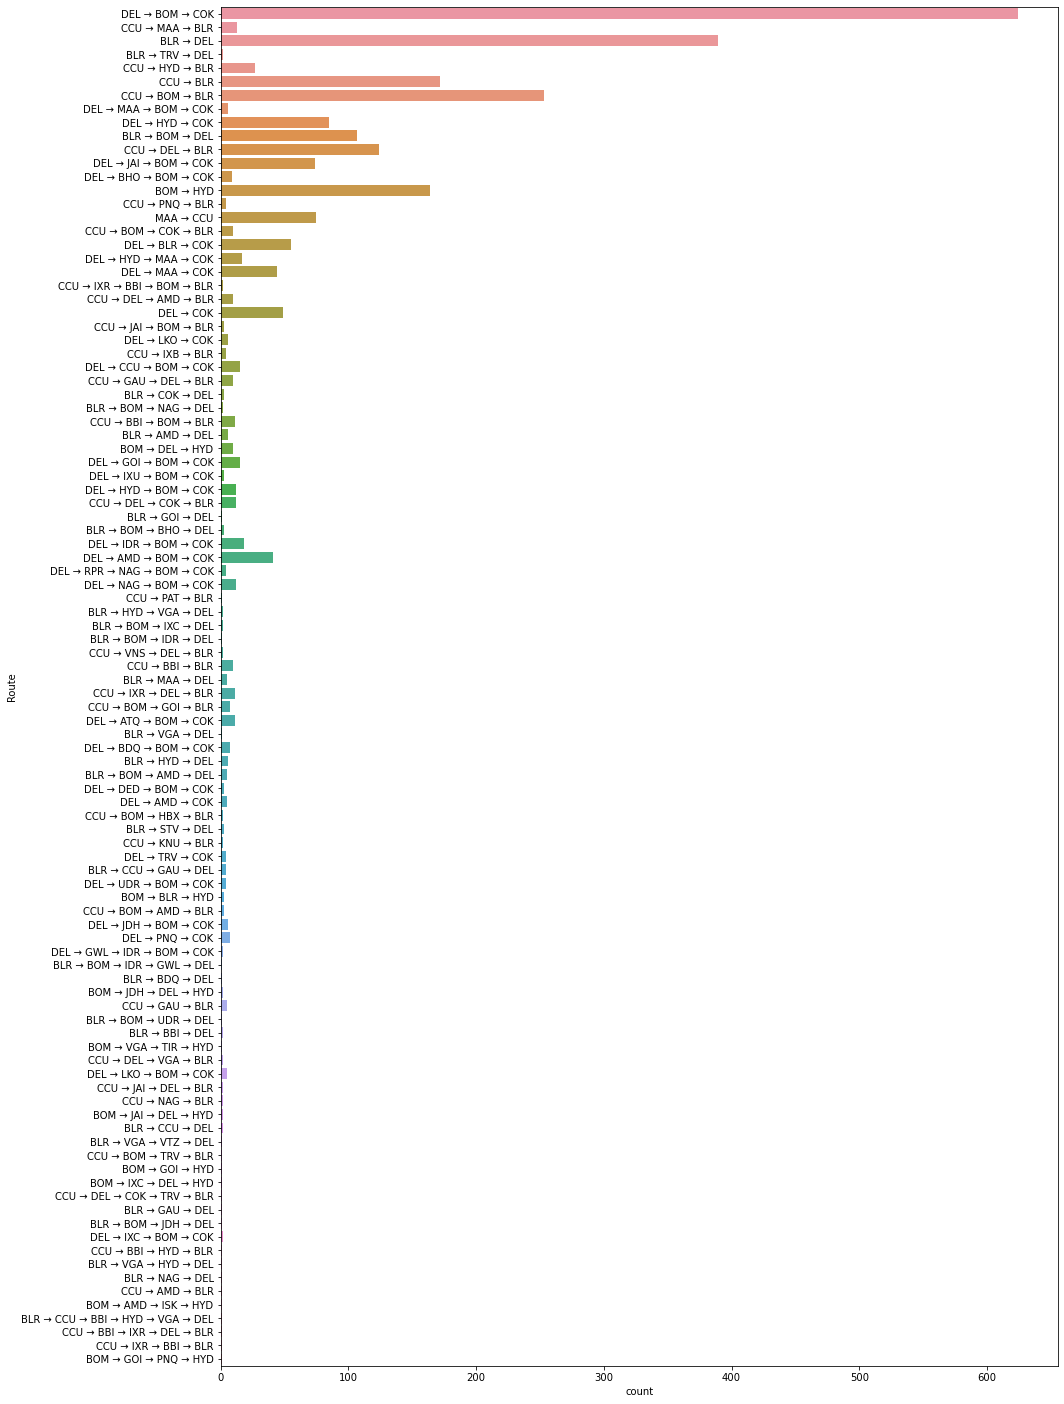

In [78]:
#Count Plot for "Route" column
print(flight_test["Route"].value_counts())
plt.figure(figsize=(15,25))
sns.countplot(y= "Route",data=flight_test)

Route DEL → BOM → COK is of most Flights

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

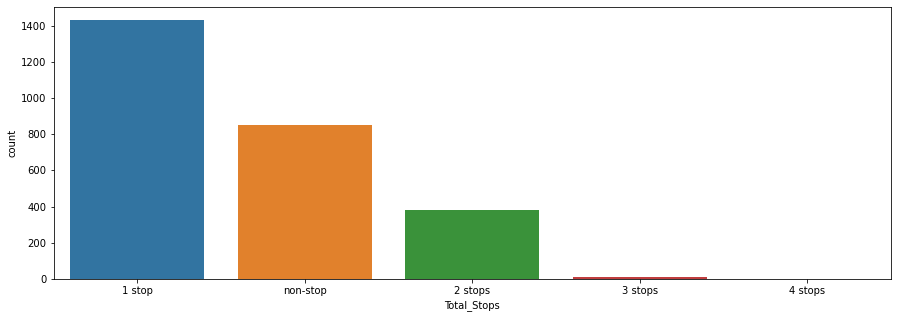

In [79]:
#Count Plot for "Total_Stops" column
print(flight_test["Total_Stops"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot("Total_Stops",data=flight_test)

1 stop of flights are most.

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64


<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

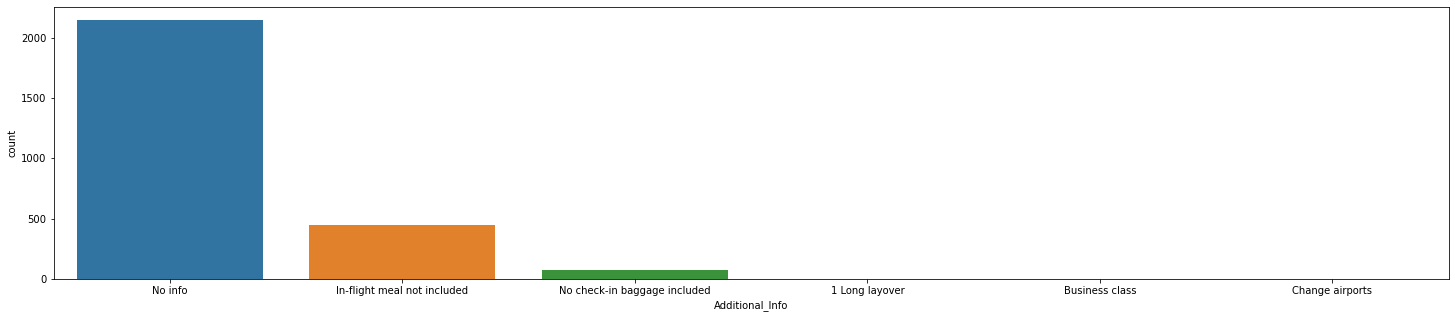

In [80]:
#Count Plot for "Additional_Info" column
print(flight_test["Additional_Info"].value_counts())
plt.figure(figsize=(25,5))
sns.countplot("Additional_Info",data=flight_test)

Additional_Info having No info is most.

### Using Histplot for Continuous column for flight_train Dataset

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64


<AxesSubplot:xlabel='Price', ylabel='Count'>

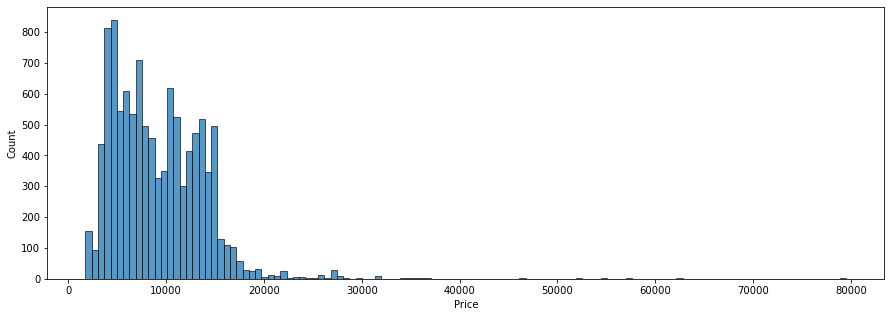

In [81]:
#HistPlot for "Price" column
print(flight_train["Price"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Price",data=flight_train)

Highest price of flight is 10262

6     2535
3     2211
5     2074
9     1406
1     1075
12     957
4      424
Name: Month_of_Journey, dtype: int64


<AxesSubplot:xlabel='Month_of_Journey', ylabel='Count'>

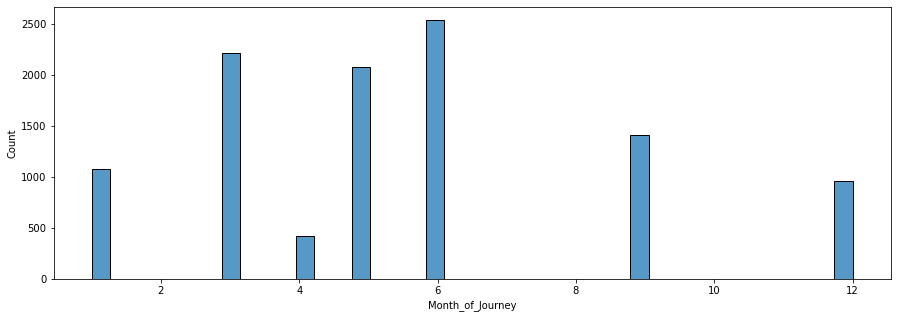

In [82]:
#HistPlot for "Month_of_Journey" column
print(flight_train["Month_of_Journey"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Month_of_Journey",data=flight_train)

In 6th Month that is June, maximum Journey (Total No= 2535) was done.

6     2166
5     1391
3     1361
27    1130
21    1111
24    1052
15     984
18     832
4      655
Name: Day_of_Journey, dtype: int64


<AxesSubplot:xlabel='Day_of_Journey', ylabel='Count'>

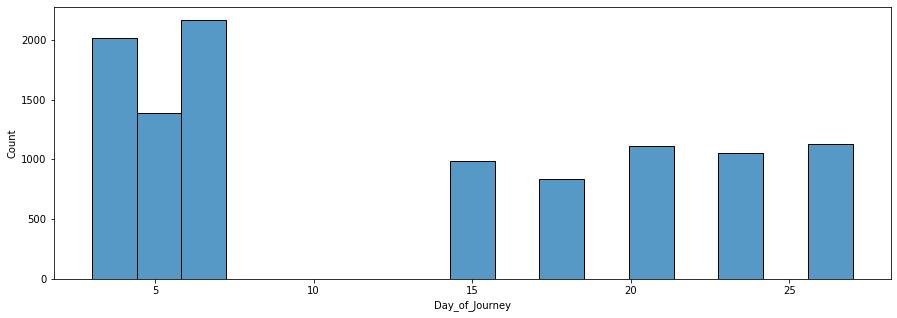

In [83]:
#HistPlot for "Day_of_Journey" column
print(flight_train["Day_of_Journey"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Day_of_Journey",data=flight_train)

On Date 6th, maximum Journey (Total No= 2166) was done.

9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_Hour, dtype: int64


<AxesSubplot:xlabel='Dep_Hour', ylabel='Count'>

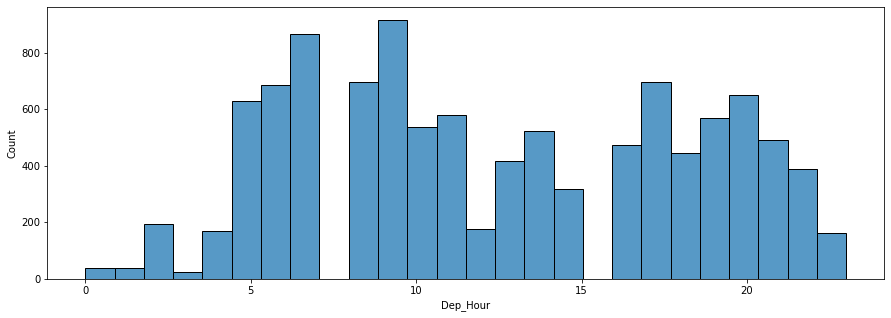

In [84]:
#Hist Plot for "Dep_Hour" column
print(flight_train["Dep_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Dep_Hour",data=flight_train)

9AM is maximum departure hour time of flight

0     2062
30    1215
55    1058
10     890
45     875
5      773
15     692
25     691
20     666
35     665
50     591
40     504
Name: Dep_Minute, dtype: int64


<AxesSubplot:xlabel='Dep_Minute', ylabel='Count'>

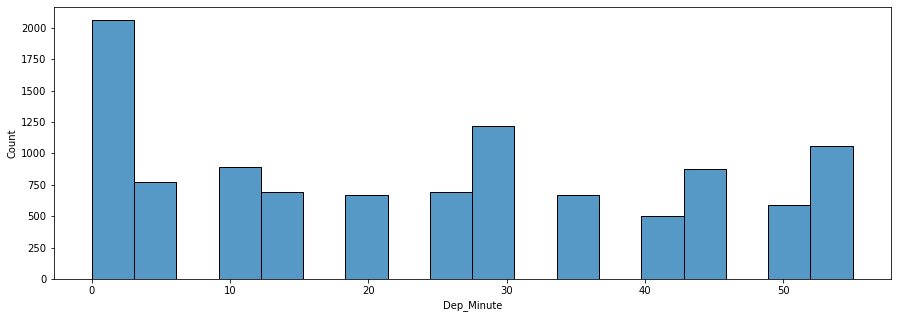

In [85]:
#Hist Plot for "Dep_Minute" column
print(flight_train["Dep_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Dep_Minute",data=flight_train)

0 min is maximum Departure minute of flight

19    1626
12     897
4      838
21     703
22     647
1      529
18     514
9      489
23     485
10     476
8      471
7      417
20     377
16     370
0      322
13     308
11     298
14     295
17     191
15     182
2       79
5       69
6       52
3       47
Name: Arrival_Hour, dtype: int64


<AxesSubplot:xlabel='Arrival_Hour', ylabel='Count'>

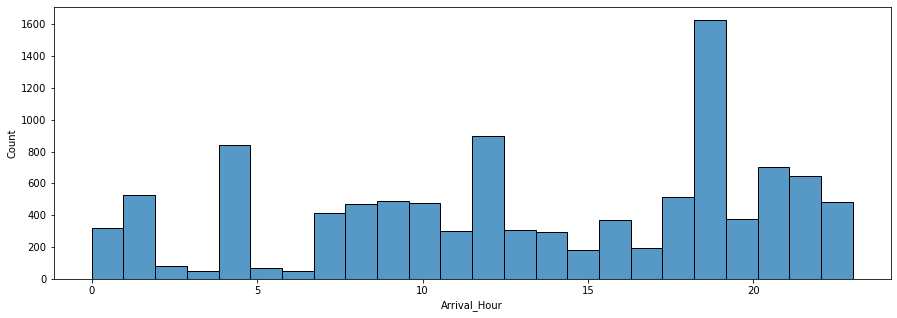

In [86]:
#Hist Plot for "Arrival_Hour" column
print(flight_train["Arrival_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Arrival_Hour",data=flight_train)

7PM is the maximum time of arrival of Flight at Destination station

0     1447
25    1301
15    1286
35    1111
20     902
30     832
50     750
45     697
5      660
40     629
10     577
55     490
Name: Arrival_Minute, dtype: int64


<AxesSubplot:xlabel='Arrival_Minute', ylabel='Count'>

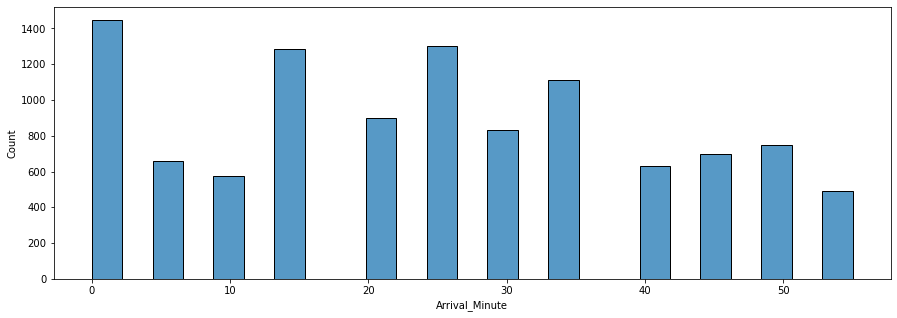

In [87]:
#HistPlot for "Arrival_Minute" column
print(flight_train["Arrival_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Arrival_Minute",data=flight_train)

0 Minute is the maximum Minute of time of arrival of Flight at Destination station

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
0        1
41       1
40       1
Name: Duration_Hours, dtype: int64


<AxesSubplot:xlabel='Duration_Hours', ylabel='Count'>

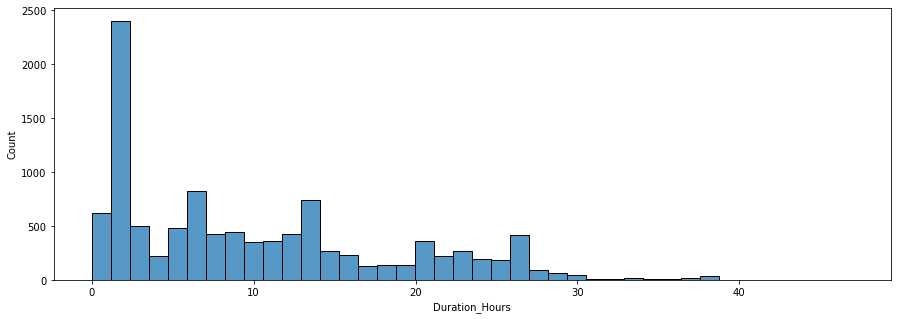

In [88]:
#HistPlot for "Duration_Hours" column
print(flight_train["Duration_Hours"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Duration_Hours",data=flight_train)

Maximum 2hour duration is taken by flight to reach at destination from source

30    1446
0     1031
20     997
50     972
35     939
55     910
15     903
45     896
25     803
40     636
5      624
10     525
Name: Duration_Minutes, dtype: int64


<AxesSubplot:xlabel='Duration_Minutes', ylabel='Count'>

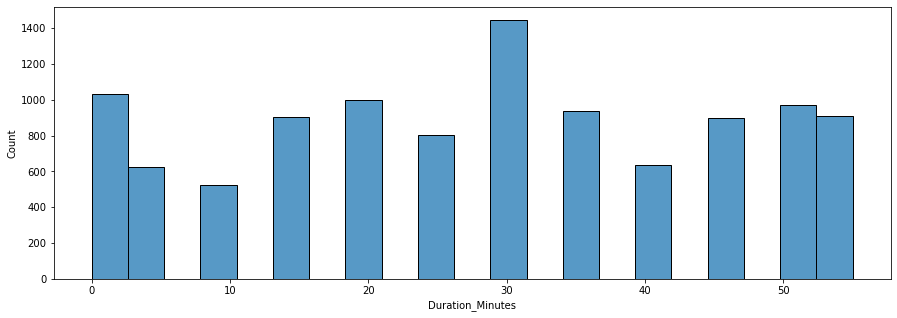

In [89]:
#HistPlot for "Duration_Minutes" column
print(flight_train["Duration_Minutes"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Duration_Minutes",data=flight_train)

Maximum 30 Minute as Duration_Minutes is taken by flight to reach at destination from source

### Using Histplot for Continuous column of flight_test Dataset

6     650
3     545
5     489
9     363
1     274
12    257
4      93
Name: Month_of_Journey, dtype: int64


<AxesSubplot:xlabel='Month_of_Journey', ylabel='Count'>

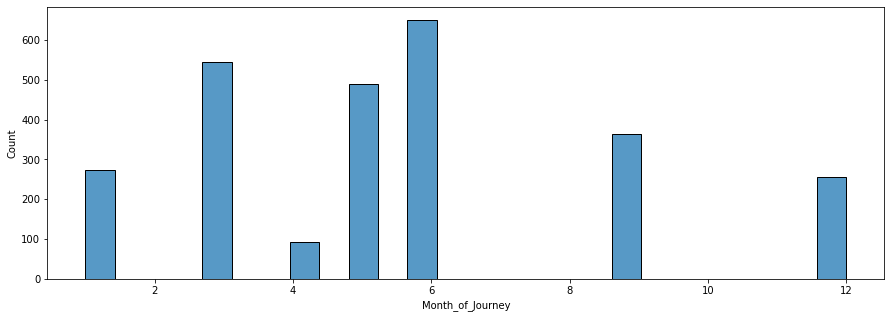

In [90]:
#Hist Plot for "Dep_Hour" column
print(flight_test["Month_of_Journey"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Month_of_Journey",data=flight_test)

In 6th Month, maximum no of journey is done.

6     561
3     378
5     374
15    267
21    257
24    255
27    220
18    204
4     155
Name: Day_of_Journey, dtype: int64


<AxesSubplot:xlabel='Day_of_Journey', ylabel='Count'>

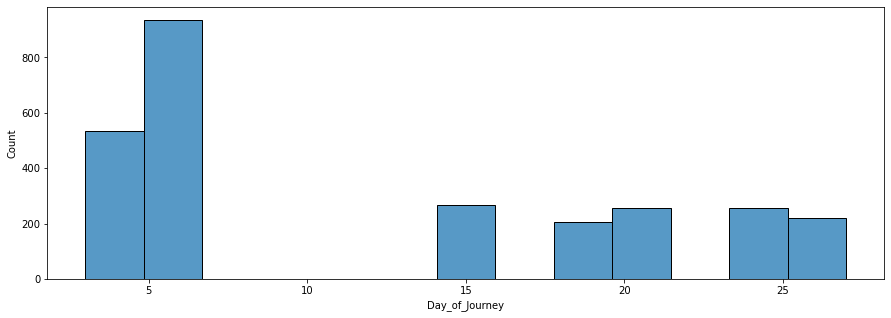

In [91]:
#Hist Plot for "Dep_Hour" column
print(flight_test["Day_of_Journey"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Day_of_Journey",data=flight_test)

On date 6th maximum no of journey is done

9     236
7     200
6     176
20    175
8     175
17    152
5     147
19    143
10    141
11    134
21    133
16    132
14    124
15    112
18    109
22     99
13     94
12     54
4      49
2      34
23     28
0      11
1       7
3       6
Name: Dep_Hour, dtype: int64


<AxesSubplot:xlabel='Dep_Hour', ylabel='Count'>

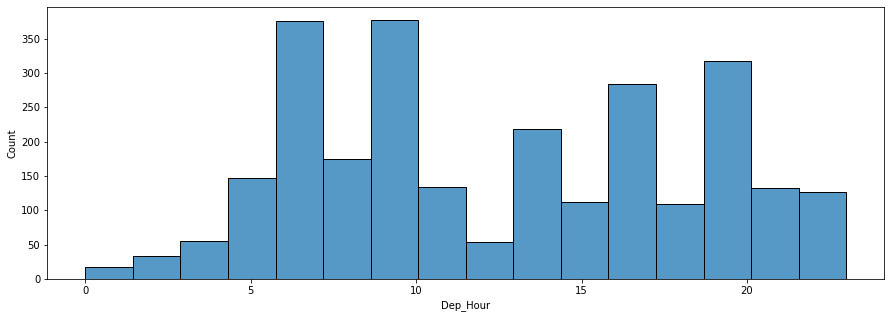

In [92]:
#Hist Plot for "Dep_Hour" column
print(flight_test["Dep_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Dep_Hour",data=flight_test)

9AM is maximum departure Hour of Flights

0     528
30    276
55    274
45    230
10    209
15    184
5     178
50    176
25    173
20    153
35    148
40    142
Name: Dep_Minute, dtype: int64


<AxesSubplot:xlabel='Dep_Minute', ylabel='Count'>

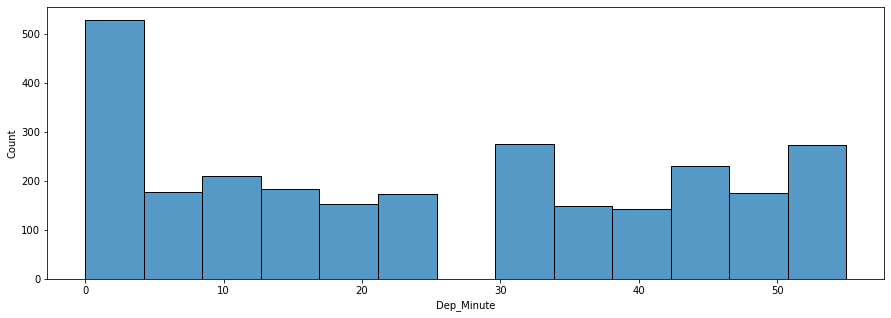

In [93]:
#Hist Plot for "Dep_Minutes" column
print(flight_test["Dep_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Dep_Minute",data=flight_test)

0 Minute is maximum departure Minute of Flights

19    431
12    198
21    195
22    190
4     175
1     159
18    126
23    123
8     123
10    117
20    112
7     101
9     101
0      89
16     79
11     67
14     65
13     64
17     51
15     40
5      26
3      14
2      13
6      12
Name: Arrival_Hour, dtype: int64


<AxesSubplot:xlabel='Arrival_Hour', ylabel='Count'>

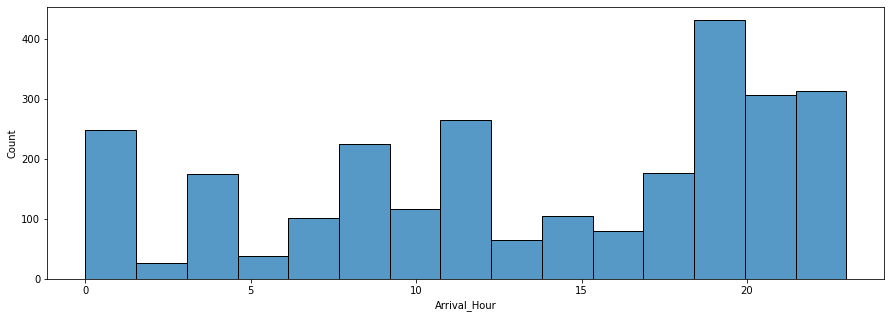

In [94]:
#Hist Plot for "Arrival_Hour" column
print(flight_test["Arrival_Hour"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Arrival_Hour",data=flight_test)

7PM is maximum Arrival Hour of Flights at destination

0     381
15    326
25    297
35    254
30    230
20    204
45    192
50    185
5     179
40    156
10    140
55    127
Name: Arrival_Minute, dtype: int64


<AxesSubplot:xlabel='Arrival_Minute', ylabel='Count'>

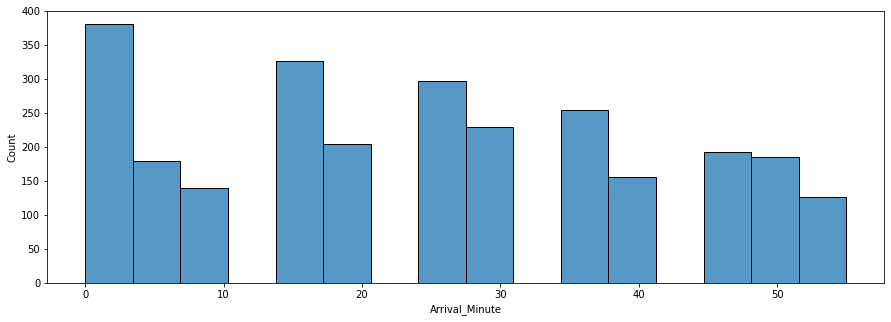

In [95]:
#Hist Plot for "Arrival_Minute" column
print(flight_test["Arrival_Minute"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Arrival_Minute",data=flight_test)

0 Minute is maximum Arrival minutes of Flights at destination

2     565
1     164
5     127
3     126
7     113
12    110
13    109
8     107
9     106
10    104
11    102
6     102
14     87
15     71
23     66
4      56
22     55
16     52
26     51
25     45
24     43
27     43
20     41
21     41
18     38
19     34
17     32
28     22
30     12
29     11
33      8
38      7
37      5
36      4
35      3
32      3
31      2
39      1
34      1
40      1
0       1
Name: Duration_Hours, dtype: int64


<AxesSubplot:xlabel='Duration_Hours', ylabel='Count'>

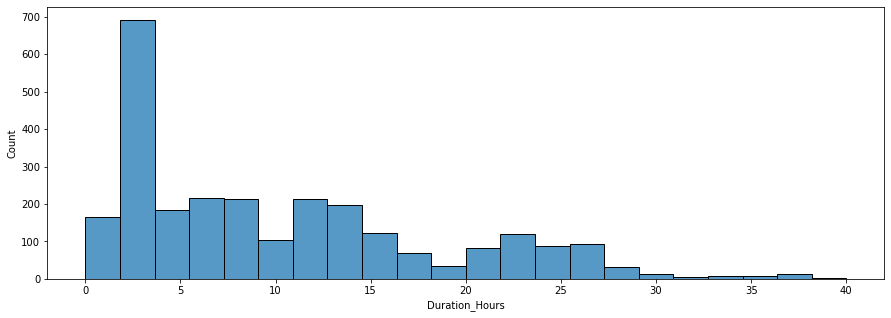

In [96]:
#Hist Plot for "Duration_Hours" column
print(flight_test["Duration_Hours"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Duration_Hours",data=flight_test)

2 Hour is maximum Duration hour of Flights to reach at destination from source

30    372
20    263
45    258
0     253
50    233
15    232
55    211
35    210
25    206
40    166
5     145
10    122
Name: Duration_Minutes, dtype: int64


<AxesSubplot:xlabel='Duration_Minutes', ylabel='Count'>

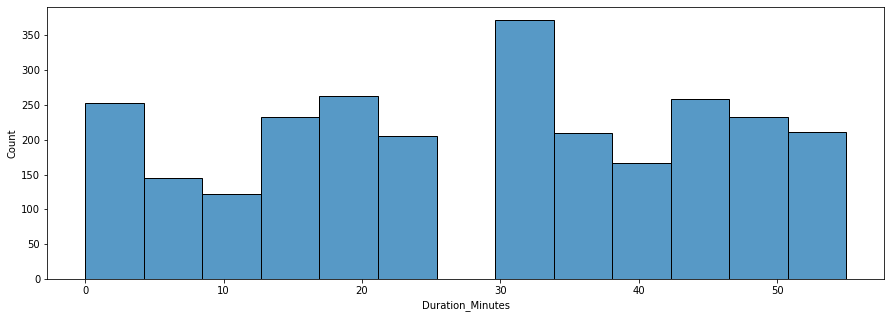

In [97]:
#Hist Plot for "Duration_Minutes" column
print(flight_test["Duration_Minutes"].value_counts())
plt.figure(figsize=(15,5))
sns.histplot(x="Duration_Minutes",data=flight_test)

30Minute is maximum Duration Minutes of Flights to reach at destination from source

## Bivariate Analysis
### Using Barplot 

<AxesSubplot:xlabel='Price', ylabel='Airline'>

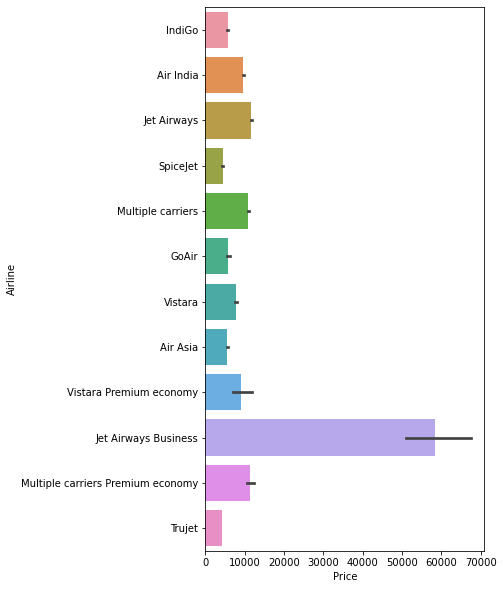

In [98]:
#CountPlot for comparision between "Airline" column and "Price" column
plt.figure(figsize=(5,10))
sns.barplot(y="Airline",data=flight_train, x='Price')

Jet Airways Business is having price of the ticket. It is approx 58000

<AxesSubplot:xlabel='Source', ylabel='Price'>

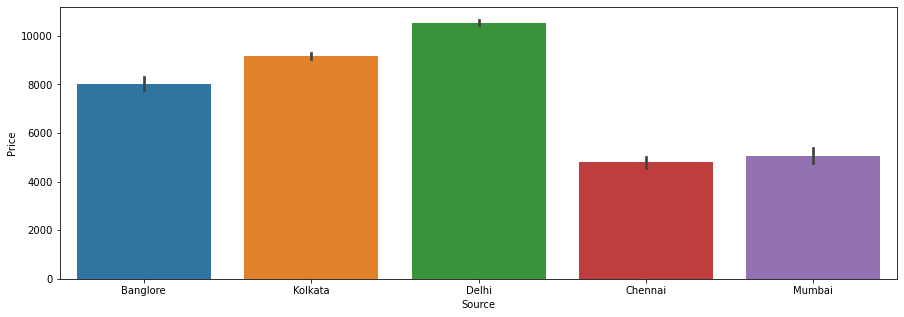

In [99]:
#CountPlot for comparision between "Source" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Source",data=flight_train, y='Price')

Source Station Delhi is having Highest price of the ticket and Least is of Chennai.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

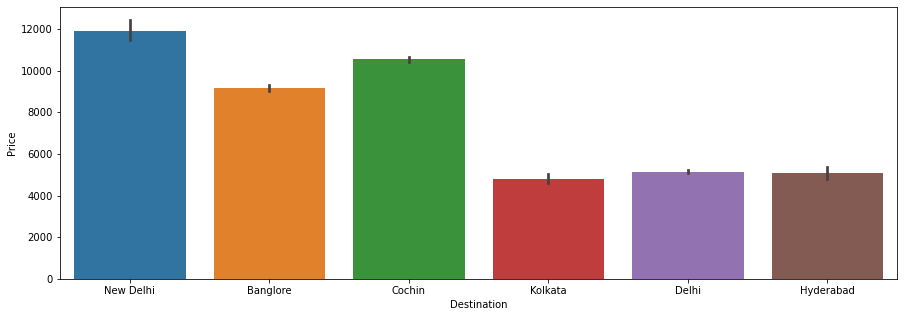

In [100]:
#BarPlot for comparision between "Destination" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Destination",data=flight_train, y='Price')

Destination Station New Delhi is having Highest price of the ticket and Least is of Kolkata.

<AxesSubplot:xlabel='Price', ylabel='Route'>

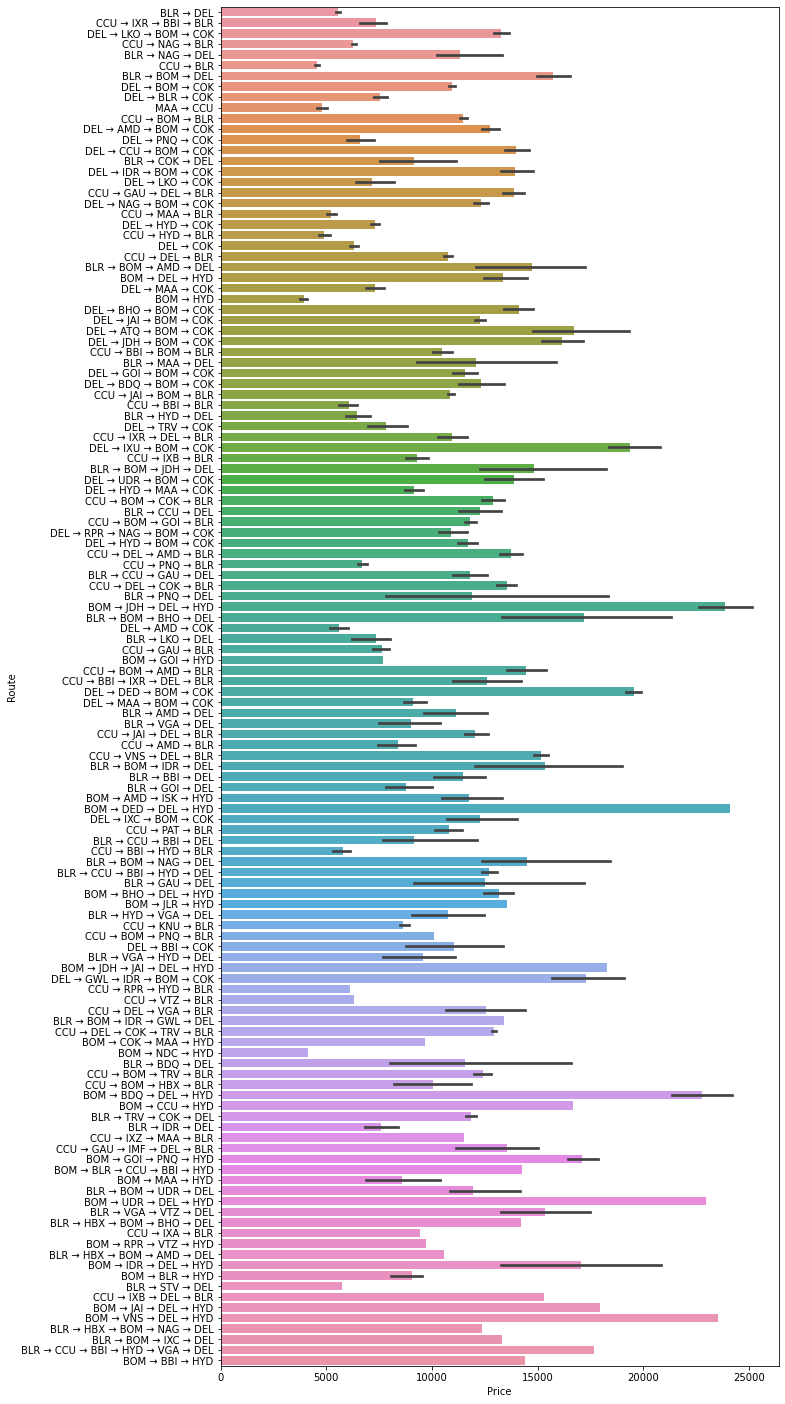

In [101]:
#BarPlot for comparision between "Route" column and "Price" column
plt.figure(figsize=(10,25))
sns.barplot(y="Route",data=flight_train, x='Price')

Route BOM->BDQ->DEL->HYD and BOM->JDH->DEL->HYD is having Highest price of the ticket.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

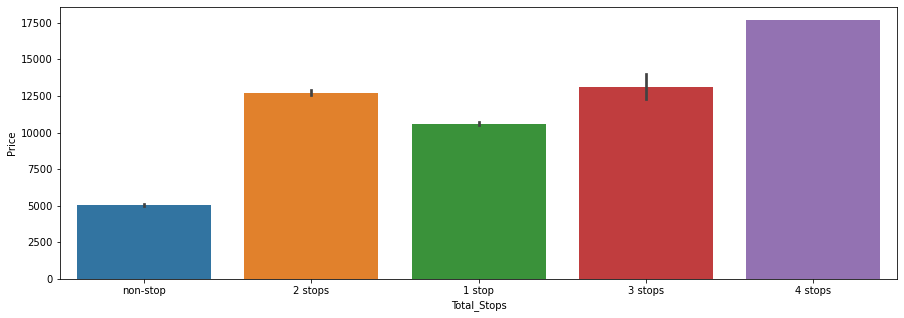

In [102]:
#BarPlot for comparision between "Total_Stops" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Total_Stops",data=flight_train, y='Price')

Total_Stops of 4 stops is having Highest price of the ticket and Least is of non-stop.

<AxesSubplot:xlabel='Price', ylabel='Additional_Info'>

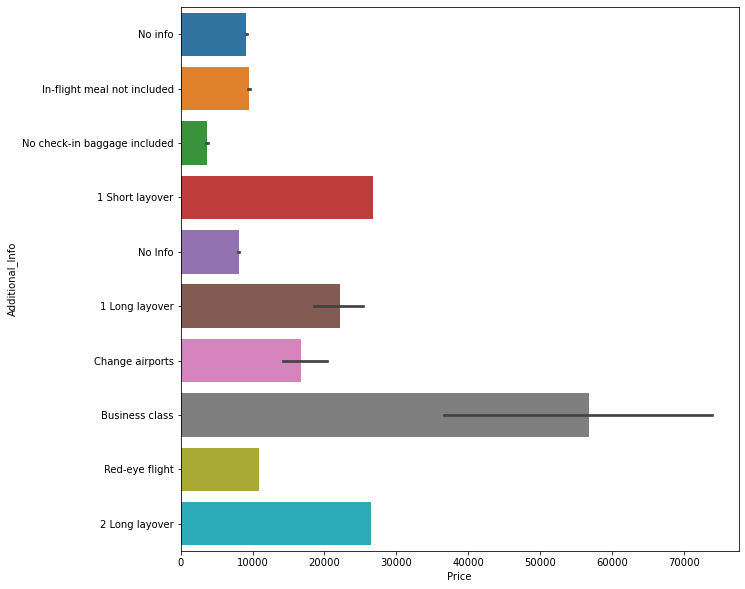

In [103]:
#BarPlot for comparision between "Additional_Info" column and "Price" column
plt.figure(figsize=(10,10))
sns.barplot(y="Additional_Info",data=flight_train, x='Price')

Business class as Additional_Info is having Highest price of the ticket and Least is of No check-in baggage included.

<AxesSubplot:xlabel='Month_of_Journey', ylabel='Price'>

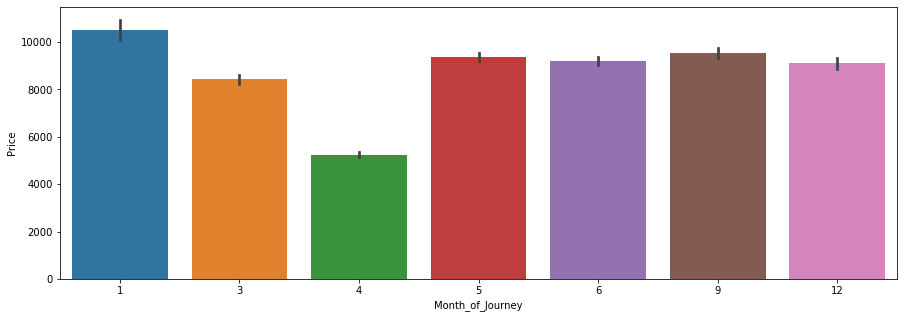

In [104]:
#BarPlot for comparision between "Month_of_Journey" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Month_of_Journey",data=flight_train, y='Price')

Journey done in 1st Month that is January is having Highest price of the ticket and Least is in 4th Mponth that is April.

<AxesSubplot:xlabel='Day_of_Journey', ylabel='Price'>

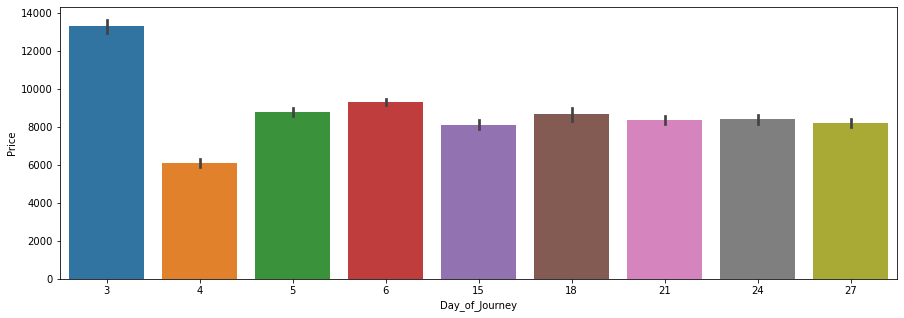

In [105]:
#BarPlot for comparision between "Day_of_Journey" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Day_of_Journey",data=flight_train, y='Price')

Journey done on date 3rd is having Highest price of the ticket and Least is of date 4th .

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

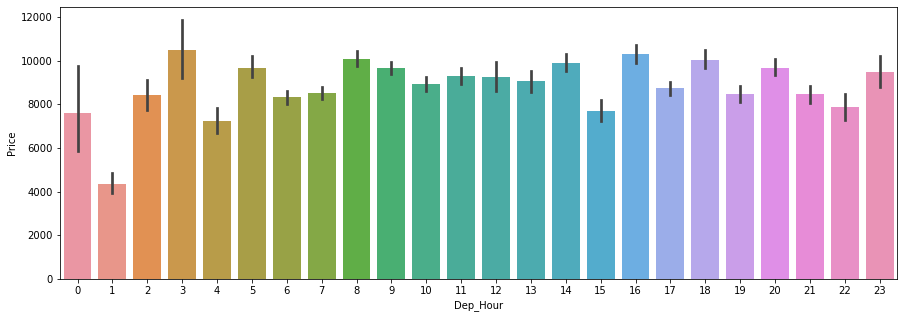

In [106]:
#BarPlot for comparision between "Dep_Hour" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Dep_Hour",data=flight_train, y='Price')

Departure Time 3AM is having Highest price of the ticket and Least is of 1AM.

<AxesSubplot:xlabel='Dep_Minute', ylabel='Price'>

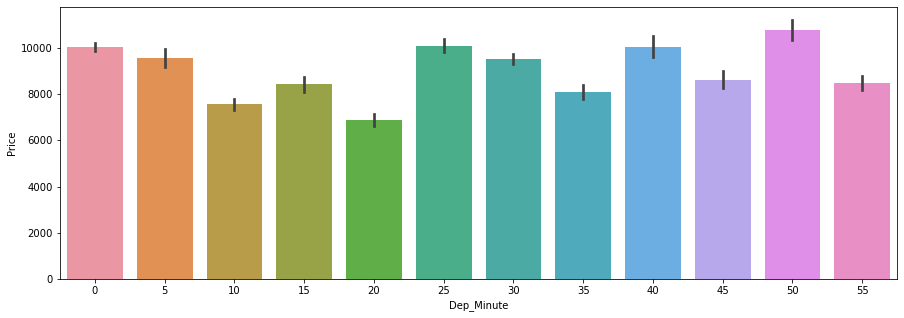

In [107]:
#BarPlot for comparision between "Dep_Minute" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Dep_Minute",data=flight_train, y='Price')

Departure Minute 50 is having Highest price of the ticket and Least is of 20minute.

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Price'>

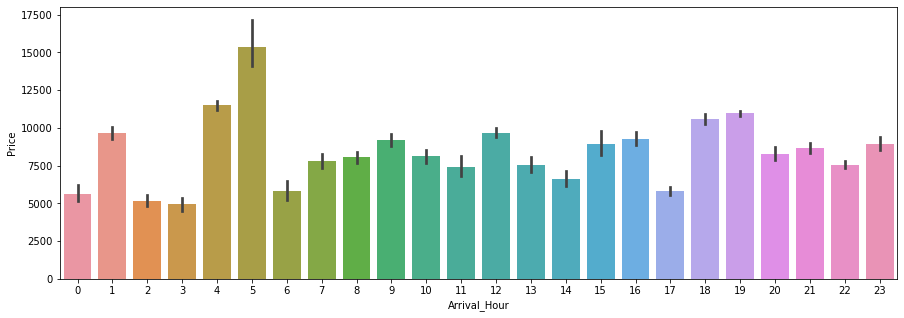

In [108]:
#BarPlot for comparision between "Arrival_Hour" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Arrival_Hour",data=flight_train, y='Price')

Arrival_Hour 5 AM at Destination is having Highest price of the ticket and Least is of 3 AM.

<AxesSubplot:xlabel='Arrival_Minute', ylabel='Price'>

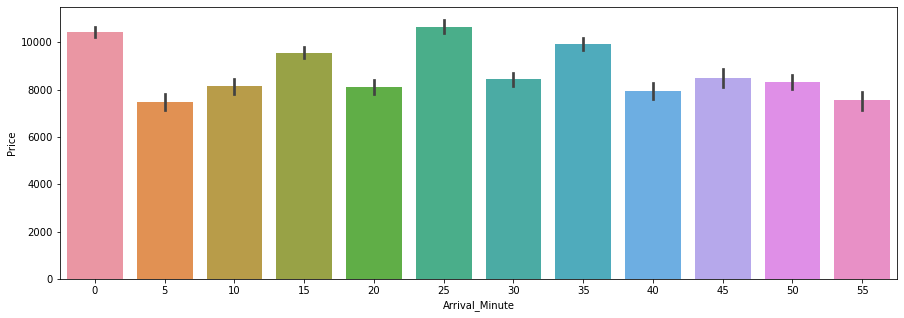

In [109]:
#BarPlot for comparision between "Arrival_Minute" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Arrival_Minute",data=flight_train, y='Price')

Arrival_Minute 25 is having Highest price of the ticket and Least is of 5 Minute at Destination.

<AxesSubplot:xlabel='Duration_Hours', ylabel='Price'>

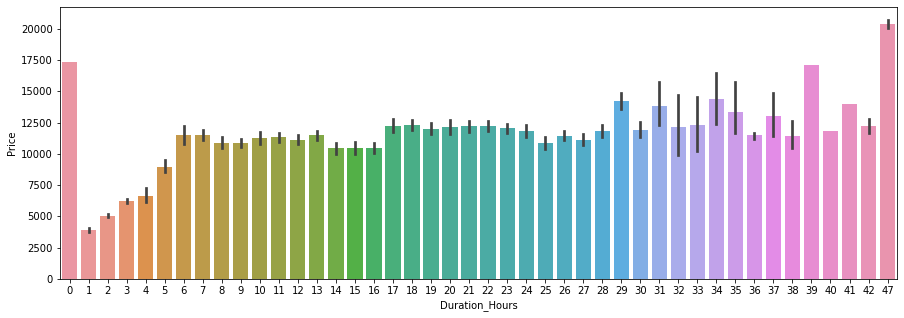

In [110]:
#BarPlot for comparision between "Duration_HoursDuration_Hours" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Duration_Hours",data=flight_train, y='Price')

Duration_Hour 47 is having Highest price of the ticket and Least is of 1 hour to reach from source to Destination.

<AxesSubplot:xlabel='Duration_Minutes', ylabel='Price'>

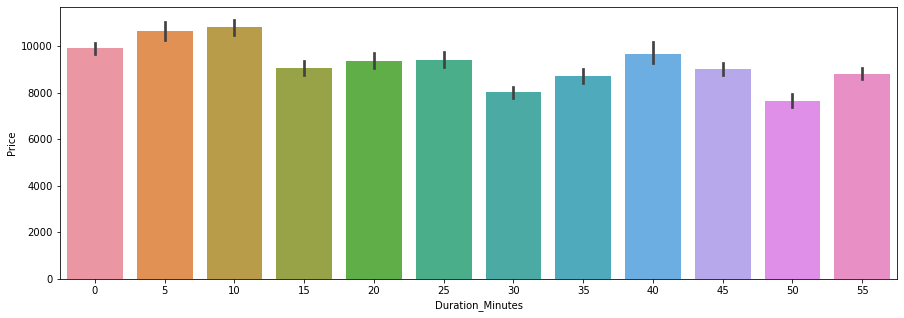

In [111]:
#BarPlot for comparision between "Duration_Minutes" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Duration_Minutes",data=flight_train, y='Price')

Duration_Minutes 10 is having Highest price of the ticket and Least is of 50 Minutes to reach from source to Destination.

## Multivariate Analysis
### Using Pairplot

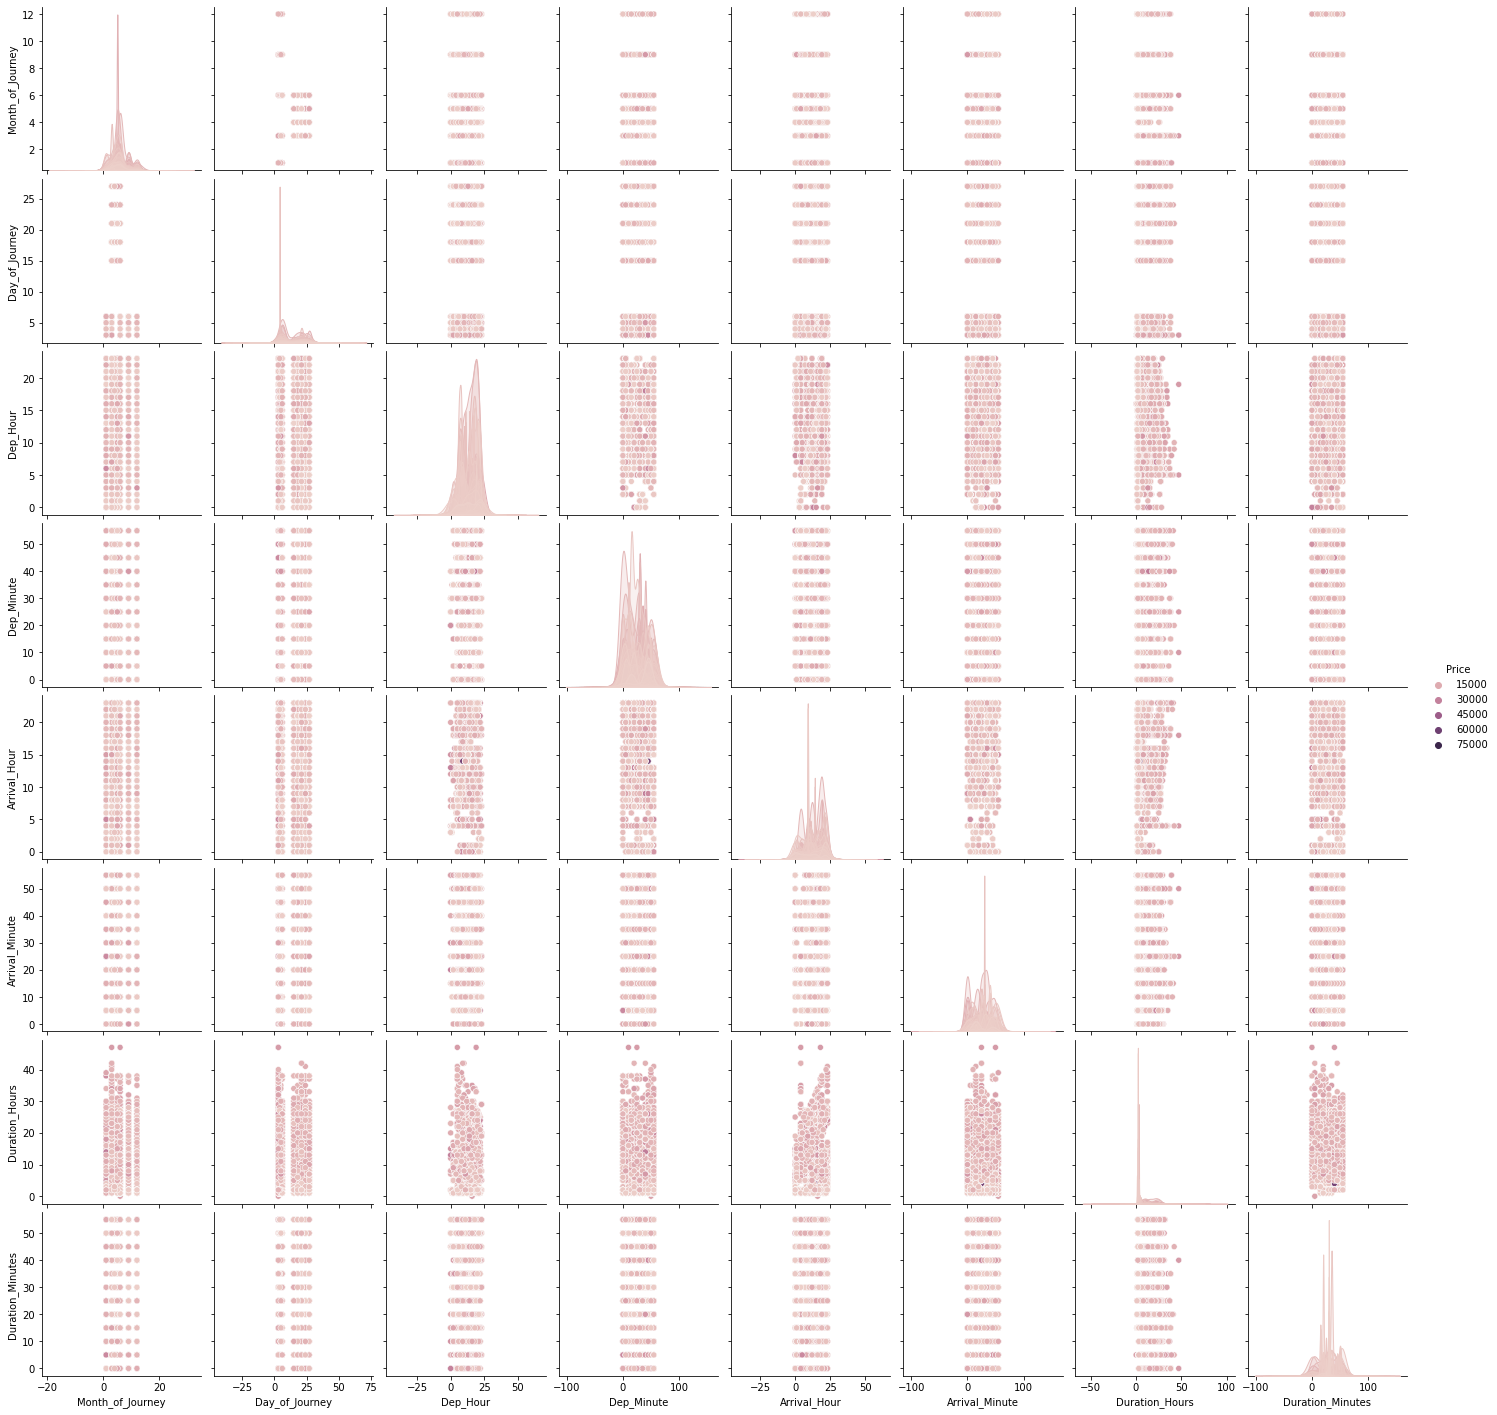

In [112]:
sns.pairplot(flight_train,hue="Price")

We can observe relationship between all the continuous column and the target column by this pairplot in pairs which are plotted on basis of target column.

#### In Additional_Info  column of flight_train Dataset 

In [113]:
#"No info" and "No Info" values are available which means same. So we will replace "No info" with "No Info"
flight_train["Additional_Info"].replace("No info","No Info",inplace=True)

In [114]:
flight_train.shape

(10682, 15)

# Label Encoding

In [115]:
#Encoding flight_train Dataset
enc = LabelEncoder()
for i in flight_train.columns:
    if flight_train[i].dtypes=="object":
        flight_train[i]=enc.fit_transform(flight_train[i].values.reshape(-1,1))

In [116]:
flight_train.dtypes

Airline             int32
Source              int32
Destination         int32
Route               int32
Total_Stops         int32
Additional_Info     int32
Price               int64
Month_of_Journey    int64
Day_of_Journey      int64
Dep_Hour            int64
Dep_Minute          int64
Arrival_Hour        int64
Arrival_Minute      int64
Duration_Hours      int64
Duration_Minutes    int64
dtype: object

In [117]:
#Encoding flight_test Dataset
enc = LabelEncoder()
for i in flight_test.columns:
    if flight_test[i].dtypes=="object":
        flight_test[i]=enc.fit_transform(flight_test[i].values.reshape(-1,1))

In [118]:
flight_test.dtypes

Airline             int32
Source              int32
Destination         int32
Route               int32
Total_Stops         int32
Additional_Info     int32
Month_of_Journey    int64
Day_of_Journey      int64
Dep_Hour            int64
Dep_Minute          int64
Arrival_Hour        int64
Arrival_Minute      int64
Duration_Hours      int64
Duration_Minutes    int64
dtype: object

### Checking dataset after transformation

In [119]:
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3,0,5,18,4,6,3897,3,24,22,20,1,10,2,50
1,1,3,0,84,1,6,7662,1,5,5,50,13,15,7,25
2,4,2,1,118,1,6,13882,9,6,9,25,4,25,19,0
3,3,3,0,91,0,6,6218,12,5,18,5,23,30,5,25
4,3,0,5,29,0,6,13302,1,3,16,50,21,35,4,45


In [120]:
flight_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,4,2,1,76,0,5,6,6,17,30,4,25,10,55
1,3,3,0,65,0,5,12,5,6,20,10,20,4,0
2,4,2,1,76,0,3,5,21,19,15,19,0,23,45
3,6,2,1,76,0,5,5,21,8,0,21,0,13,0
4,0,0,2,16,4,5,6,24,23,55,2,45,2,50


# Checking Correlation

In [121]:
#flight_train Dataset
flight_train.corr()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
Airline,1.000000,-0.013397,0.018446,0.025214,0.035973,0.090588,-0.039565,-0.007900,0.031118,-0.035269,-0.059922,-0.007567,-0.071092,-0.158136,-0.028009
Source,-0.013397,1.000000,-0.592576,0.403412,-0.225605,0.008036,0.015999,0.063052,0.007563,0.059047,-0.056998,0.025635,0.021040,0.166121,-0.145193
Destination,0.018446,-0.592576,1.000000,-0.461176,0.337872,0.015903,-0.071122,-0.105035,-0.052102,-0.072997,0.127931,-0.039729,0.017196,-0.258446,0.061235
Route,0.025214,0.403412,-0.461176,1.000000,-0.437749,0.029317,0.164149,0.042194,0.096601,-0.075002,-0.068071,0.013898,-0.173352,0.295444,-0.232427
Total_Stops,0.035973,-0.225605,0.337872,-0.437749,1.000000,0.242029,-0.571221,-0.056514,0.043844,0.039224,0.048901,-0.095650,0.175980,-0.606137,0.182223
Additional_Info,0.090588,0.008036,0.015903,0.029317,0.242029,1.000000,-0.191643,-0.000164,0.017554,-0.043020,0.001673,-0.019455,0.028698,-0.218023,0.054365
Price,-0.039565,0.015999,-0.071122,0.164149,-0.571221,-0.191643,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Month_of_Journey,-0.007900,0.063052,-0.105035,0.042194,-0.056514,-0.000164,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597
Day_of_Journey,0.031118,0.007563,-0.052102,0.096601,0.043844,0.017554,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708
Dep_Hour,-0.035269,0.059047,-0.072997,-0.075002,0.039224,-0.043020,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707


This gives the correlation between the denpendent and independent variables.

In [122]:
flight_train.corr()["Price"].sort_values()

Total_Stops        -0.571221
Additional_Info    -0.191643
Day_of_Journey     -0.165448
Duration_Minutes   -0.124855
Arrival_Minute     -0.086155
Destination        -0.071122
Airline            -0.039565
Dep_Minute         -0.024458
Dep_Hour            0.006799
Month_of_Journey    0.010705
Source              0.015999
Arrival_Hour        0.024244
Route               0.164149
Duration_Hours      0.508778
Price               1.000000
Name: Price, dtype: float64

#### We can observe :

- All columns are sorted in ascending order showing least to strong correlation with target column.
- 8 columns are negatively correlated and 6 columns are positively correlated.
- Column 'Duration_Hours' is highly positively correlated with Target column and Column 'Total_Stops' is highly negatively correlated with Target column

### Checking correlation with heatmap

<AxesSubplot:>

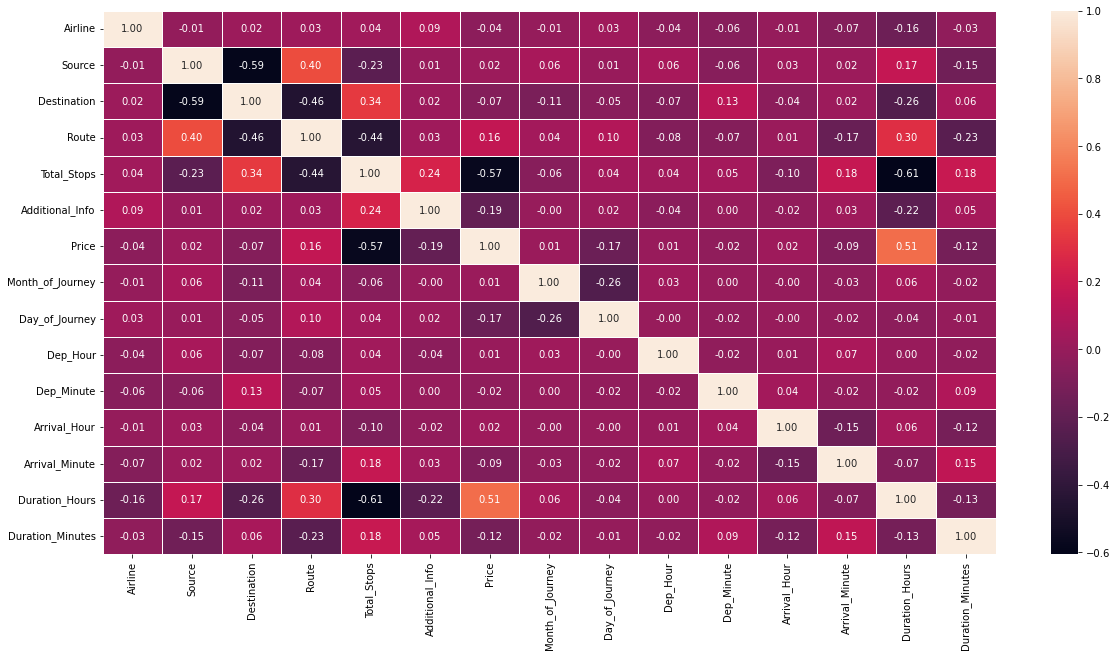

In [123]:
plt.figure(figsize=(20,10))
sns.heatmap(flight_train.corr(),annot=True,annot_kws= {"size": 10}, linewidth=0.5, linecolor='white', fmt='.2f')

### Outcome of Correlation
- __Airline__ has __-4 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Source__ has __2 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Destination__ has __-7 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Route__ has __16 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Total_Stops__ has __-57 percent__ correlation with the target column which can be considered as weak correlation and negatively correlated. 
- __Additional_Info__ has __-19 percent__ correlation with the target column which can be considered as strong correlation and negatively correlated. 
- __Month_of_Journey__ has __1 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Day_of_Journey__ has __-17 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Dep_Hour__ has __1 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Dep_Minute__ has __-2 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Arrival_Hour__ has __2 percent__ correlation with the target column which can be considered as good correlation and positively correlated. 
- __Arrival_Minute__ has __-9 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 
- __Duration_Hours__ has __51 percent__ correlation with the target column which can be considered as strong correlation and positively correlated. 
- __Duration_Minutes__ has __-12 percent__ correlation with the target column which can be considered as good correlation and negatively correlated. 


 - Max correlation is with __Duration_Hours__
 - Min correlation is with __Total_Stops__

### Checking correlation with barplot

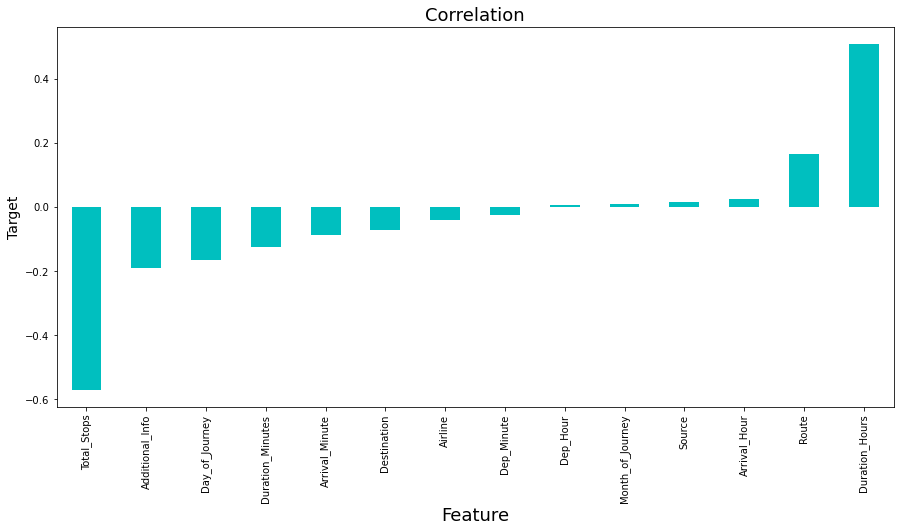

In [124]:
plt.figure(figsize=(15,7))
flight_train.corr()['Price'].sort_values(ascending=True).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

#### Observation:
- Here we can see there is least correlation between Dep_Hour column and Target Column, Price. 
- Target column (Price) has Highest Positively Correlation is with Duration_Hours.
- Target column (Price) has Highest Negatively Correlation is with Total_Stops.

#### flight_test Dataset: We will not check correlation as Target Variable is not present in this Dataset

In [125]:
flight_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Day_of_Journey',
       'Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

## Checking Outliers

### flight_train Dataset

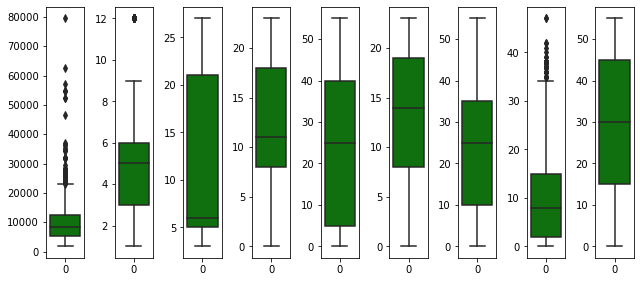

In [126]:
#checking outliers only for Continuous Column as we can not remove outliers of Categorical Column. So there is no need to check Outliers in Categorical Column.
collist=[ 'Price','Month_of_Journey', 'Day_of_Journey', 'Dep_Hour','Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes']
ncol=9
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=flight_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation:
- __Outliers present in columns:__ "Price", "Month_of_Journey" and "Duration_Hours".

- But we will not remove Outliers from "Price" column as it is our Target column.

- __Outliers not present in columns:__ 'Day_of_Journey', 'Dep_Hour','Dep_Minute', 'Arrival_Hour', 'Arrival_Minute' and 'Duration_Minutes'.

# Removing Outliers
## 1.1 Zscore method using Scipy

In [127]:
#  Outliers will be removed only from Continuous column i.e; "Month_of_Journey" and "Duration_Hours". 
# We will not remove outliers from Target column i.e; Price.

variable = flight_train[['Month_of_Journey', 'Duration_Hours']]

z=np.abs(zscore(variable))

# Creating new dataframe
flight_price = flight_train[(z<3).all(axis=1)]
flight_price.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3,0,5,18,4,6,3897,3,24,22,20,1,10,2,50
1,1,3,0,84,1,6,7662,1,5,5,50,13,15,7,25
2,4,2,1,118,1,6,13882,9,6,9,25,4,25,19,0
3,3,3,0,91,0,6,6218,12,5,18,5,23,30,5,25
4,3,0,5,29,0,6,13302,1,3,16,50,21,35,4,45


In [128]:
z.head()

,Month_of_Journey,Duration_Hours
0,0.848450,0.970614
1,1.517909,0.381999
2,1.159928,1.030677
3,2.164117,0.617445
4,1.517909,0.735168


In [129]:
print("Old DataFrame data in Rows and Column:",flight_train.shape)
print("New DataFrame data in Rows and Column:",flight_price.shape)
print("Total Dropped rows:",flight_train.shape[0]-flight_price.shape[0])

Old DataFrame data in Rows and Column: (10682, 15)
New DataFrame data in Rows and Column: (10616, 15)
Total Dropped rows: 66


### Percentage Data Loss using Zscore

In [130]:
loss_percent=(10682-10616)/10682*100
print(loss_percent,"%")

0.6178618236285339 %


## 2. IQR (Inter Quantile Range) method

In [131]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
flight_price_pred=flight_train[~((flight_train < (Q1 - 1.5 * IQR)) |(flight_train > (Q3 + 1.5 * IQR))).any(axis=1)]

In [132]:
print("Old DataFrame data in Rows and Column:",flight_train.shape)
print("\nNew DataFrame data in Rows and Column:",flight_price_pred.shape)
print("\nTotal Dropped rows:",flight_train.shape[0]-flight_price_pred.shape[0])

Old DataFrame data in Rows and Column: (10682, 15)

New DataFrame data in Rows and Column: (9656, 15)

Total Dropped rows: 1026


### Percentage Data Loss using IQR

In [133]:
loss_perc = (10682-9656)/10682*100
loss_perc

9.604942894589028

##### We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.

### flight_test Dataset

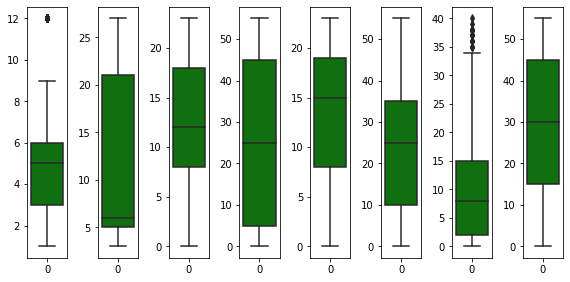

In [134]:
#checking outliers only for Continuous Column as we can not remove outliers of Categorical Column. So there is no need to check Outliers in Categorical Column.
collist=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour','Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes']
ncol=9
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=flight_test[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Observation:
- __Outliers present in columns:__  "Month_of_Journey" and "Duration_Hours".
- __Outliers not present in columns:__ 'Day_of_Journey', 'Dep_Hour','Dep_Minute', 'Arrival_Hour', 'Arrival_Minute' and 'Duration_Minutes'.

# Removing Outliers
## 1. Zscore method using Scipy

In [135]:
#  Outliers will be removed only from Continuous column i.e; "Month_of_Journey" and "Duration_Hours". 
# We will not remove outliers from Target column i.e; Price.

variable = flight_train[['Month_of_Journey', 'Duration_Hours']]

z1=np.abs(zscore(variable))

# Creating new dataframe
flight_price1 = flight_test[(z1<3).all(axis=1)]
flight_price1.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,4,2,1,76,0,5,6,6,17,30,4,25,10,55
1,3,3,0,65,0,5,12,5,6,20,10,20,4,0
2,4,2,1,76,0,3,5,21,19,15,19,0,23,45
3,6,2,1,76,0,5,5,21,8,0,21,0,13,0
4,0,0,2,16,4,5,6,24,23,55,2,45,2,50


In [136]:
z1.head()

,Month_of_Journey,Duration_Hours
0,0.848450,0.970614
1,1.517909,0.381999
2,1.159928,1.030677
3,2.164117,0.617445
4,1.517909,0.735168


In [137]:
print("Old DataFrame data in Rows and Column:",flight_test.shape)
print("New DataFrame data in Rows and Column:",flight_price1.shape)
print("Total Dropped rows:",flight_test.shape[0]-flight_price1.shape[0])

Old DataFrame data in Rows and Column: (2671, 14)
New DataFrame data in Rows and Column: (2654, 14)
Total Dropped rows: 17


### Percentage Data Loss using Zscore

In [138]:
loss_percent1=(2671-2654)/2671*100
print(loss_percent1,"%")

0.636465743167353 %


## 2.1 IQR (Inter Quantile Range) method

In [139]:
#1st quantile
Q1=variable.quantile(0.25)

# 3rd quantile
Q3=variable.quantile(0.75)

#IQR
IQR=Q3 - Q1
flight_price_pred1=flight_test[~((flight_test < (Q1 - 1.5 * IQR)) |(flight_test > (Q3 + 1.5 * IQR))).any(axis=1)]

In [140]:
print("Old DataFrame data in Rows and Column:",flight_test.shape)
print("\nNew DataFrame data in Rows and Column:",flight_price_pred1.shape)
print("\nTotal Dropped rows:",flight_test.shape[0]-flight_price_pred1.shape[0])

Old DataFrame data in Rows and Column: (2671, 14)

New DataFrame data in Rows and Column: (2394, 14)

Total Dropped rows: 277


### Percentage Data Loss using IQR

In [141]:
loss_perc1 = (2671-2394)/2671*100
loss_perc1

10.370647697491577

We can check by using IQR method there is large data loss in comparision to Zscore method. So, we will consider Zscore method.
flight_test Dataset

# Checking Skewness

In [142]:
flight_price.skew()

Airline             0.728762
Source             -0.423176
Destination         1.239071
Route              -0.496488
Total_Stops         0.627342
Additional_Info    -3.255059
Price               1.824353
Month_of_Journey    0.628240
Day_of_Journey      0.366867
Dep_Hour            0.103647
Dep_Minute          0.164757
Arrival_Hour       -0.361408
Arrival_Minute      0.107806
Duration_Hours      0.761330
Duration_Minutes   -0.097193
dtype: float64

### Observation:
- Skewness threshold taken is +/-0.25
- All the columns are not normallly distributed, they are skewed.
- Columns which are having skewness: Airline,Source, Destination,Route, Total_Stops, Additional_Info, Price, Month_of_Journey, Day_of_Journey, Dep_Hour, Arrival_Hour, Duration_Hours. 
- The Additional_Info column data is negatively highly skewed and Price is positively highly skewed
- Since Airline,Source, Destination,Route, Total_Stops, Additional_Info are categorical column so we will not remove skewness and Price is Target Column so we will not remove skewness. 
- So we will remove skewness from Month_of_Journey, Day_of_Journey, Dep_Hour, Arrival_Hour, Duration_Hours as these column contains continuous data.

## Checking skweness through Data Visualization also

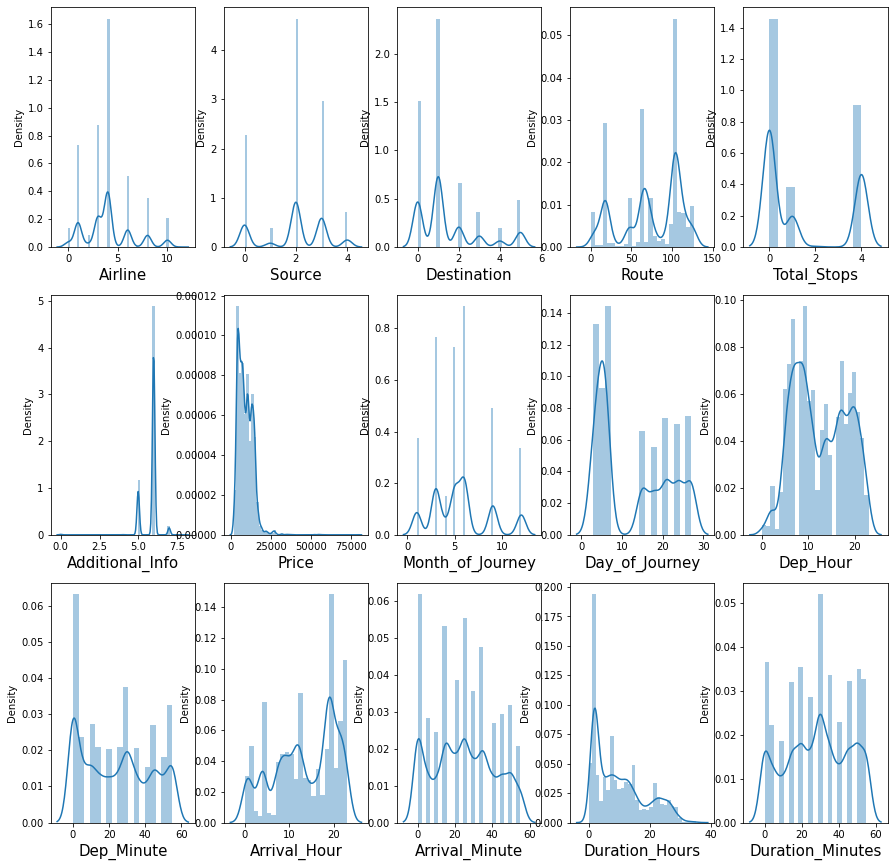

In [143]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in flight_price:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(flight_price[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see all columns are highly skewed but we will remove skewness only from continuous columns

## Removing skewness using yeo-johnson method

In [144]:
collist=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours']
flight_price[collist]=power_transform(flight_price[collist],method='yeo-johnson')
flight_price[collist]

,Month_of_Journey,Day_of_Journey,Dep_Hour,Arrival_Hour,Duration_Hours
0,-0.820758,1.179733,1.545322,-1.788986,-1.172623
1,-1.884535,-0.826591,-1.364302,-0.049155,-0.047501
2,1.137044,-0.603889,-0.558956,-1.357355,1.097592
3,1.846252,-0.826591,0.950912,1.415258,-0.387900
4,-1.884535,-1.419477,0.639248,1.121763,-0.599096
...,...,...,...,...,...
10678,1.137044,-1.091908,1.102891,1.268478,-1.172623
10679,-0.409120,1.333835,1.252524,1.415258,-1.172623
10680,-0.409120,1.333835,-0.749030,-0.340925,-0.852888
10681,-1.884535,-1.419477,-0.195608,0.096896,-1.172623


## checking skewness after removal

In [145]:
flight_price.skew()

Airline             0.728762
Source             -0.423176
Destination         1.239071
Route              -0.496488
Total_Stops         0.627342
Additional_Info    -3.255059
Price               1.824353
Month_of_Journey   -0.026564
Day_of_Journey      0.016703
Dep_Hour           -0.106063
Dep_Minute          0.164757
Arrival_Hour       -0.353419
Arrival_Minute      0.107806
Duration_Hours     -0.033423
Duration_Minutes   -0.097193
dtype: float64

Still we can see skewness is present but from earlier it is removed.

### checking skewness after removal through data visualization using distplot

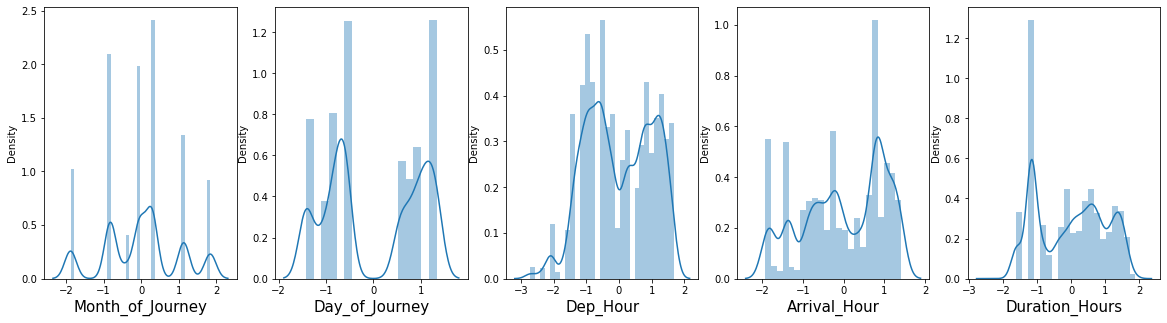

In [146]:
collist=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours']
plt.figure(figsize=(20,5), facecolor='white')
plotnumber = 1

for column in flight_price[collist]:
    if plotnumber<=15:
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(flight_price[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

The data is not normal and the skewness is still present in some columns.

## 2.1 Checking skewness of flight_test Dataset

In [147]:
flight_price1.skew()

Airline             0.486614
Source             -0.422737
Destination         1.261550
Route              -0.279149
Total_Stops         0.671750
Additional_Info    -1.717491
Month_of_Journey    0.589720
Day_of_Journey      0.477480
Dep_Hour            0.089648
Dep_Minute          0.126586
Arrival_Hour       -0.441421
Arrival_Minute      0.115106
Duration_Hours      0.882864
Duration_Minutes   -0.105053
dtype: float64

### Observation:
- Skewness threshold taken is +/-0.25
- All the columns are not normallly distributed, they are skewed.
- Columns which are having skewness: Airline, Source, Destination, Route, Total_Stops, Additional_Info, Month_of_Journey, Day_of_Journey, Arrival_Hour, Duration_Hours.
- The Additional_Info column data is negatively highly skewed and Destination is positively highly skewed
- Since Airline,Source, Destination,Route, Total_Stops, Additional_Info are categorical column so we will not remove skewness and Price is Target Column so we will not remove skewness.
- So we will remove skewness from Month_of_Journey, Day_of_Journey, Arrival_Hour, Duration_Hours as these column contains continuous data.

## 2.2 Checking skweness through Data Visualization also

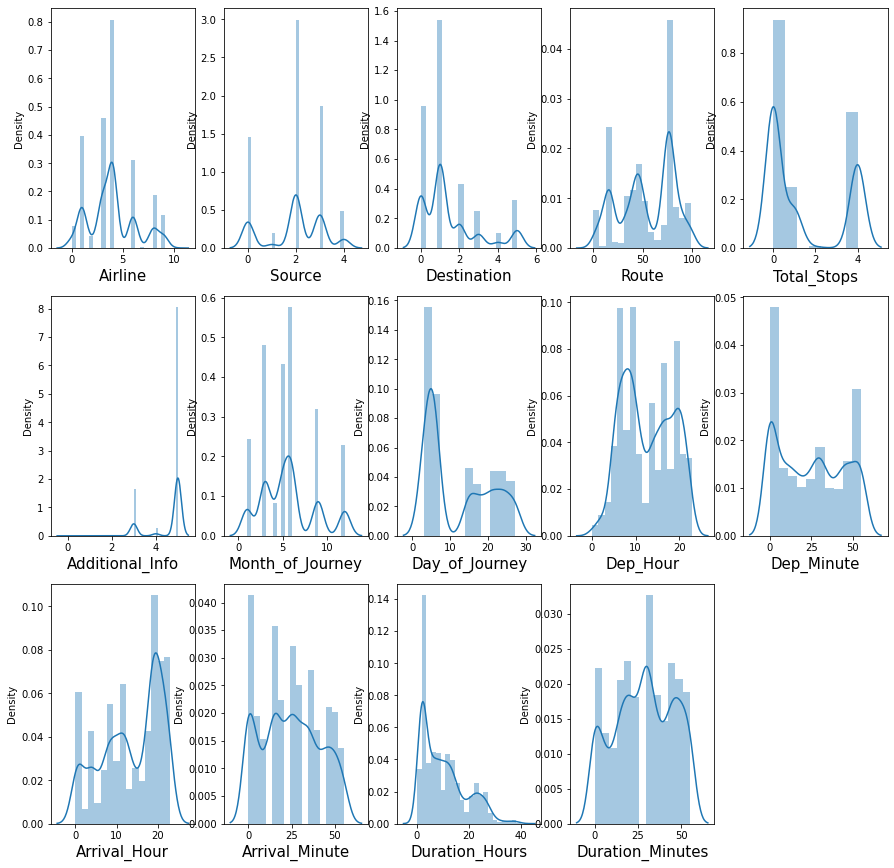

In [148]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in flight_price1:
    if plotnumber<=15:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(flight_price1[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

We can see all columns are highly skewed but we will remove skewness only from continuous columns

## 2.3 Removing skewness using yeo-johnson method

In [149]:
collist1=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours']
flight_price1[collist1]=power_transform(flight_price1[collist1],method='yeo-johnson')
flight_price1[collist1]

,Month_of_Journey,Day_of_Journey,Dep_Hour,Arrival_Hour,Duration_Hours
0,0.261281,-0.513406,0.788014,-1.361212,0.323258
1,1.805093,-0.751899,-1.178513,-0.525037,-0.615345
2,-0.064498,1.082760,1.098546,0.769480,1.325222
3,-0.064498,1.082760,-0.774137,1.061476,0.624946
4,0.261281,1.243178,1.692730,-1.631156,-1.186309
...,...,...,...,...,...
2666,0.261281,-0.513406,1.250241,0.915314,1.325222
2667,-0.826892,1.382628,0.301607,0.334105,-1.186309
2668,0.261281,-1.408545,1.399753,-1.361212,-0.223542
2669,0.261281,-1.408545,-1.620241,0.769480,0.795044


## 2.4 checking skewness after removal

In [150]:
flight_price1.skew()

Airline             0.486614
Source             -0.422737
Destination         1.261550
Route              -0.279149
Total_Stops         0.671750
Additional_Info    -1.717491
Month_of_Journey   -0.032768
Day_of_Journey      0.060947
Dep_Hour           -0.107620
Dep_Minute          0.126586
Arrival_Hour       -0.407360
Arrival_Minute      0.115106
Duration_Hours     -0.033827
Duration_Minutes   -0.105053
dtype: float64

## 2.5 checking skewness after removal through data visualization using distplot

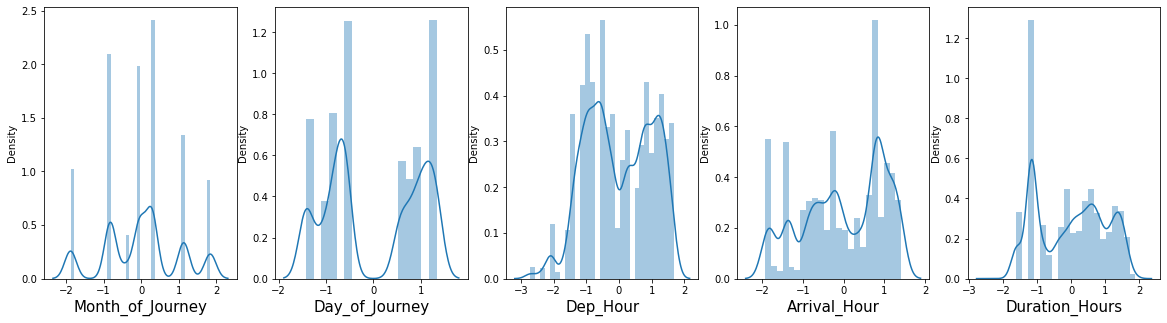

In [151]:
collist=['Month_of_Journey', 'Day_of_Journey', 'Dep_Hour', 'Arrival_Hour', 'Duration_Hours']
plt.figure(figsize=(20,5), facecolor='white')
plotnumber = 1

for column in flight_price[collist]:
    if plotnumber<=15:
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(flight_price[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

The data is not normal and the skewness is still present in some columns.

We can not process Data Preprocessing with flight_test Dataset as it is testing data. And it have no Target Variable. So we will only do Data preprocessing on flight_train Dataset as it is training dataset.  We have also not combined train and test data because of data leakage due to which our test data will know some of the results which is not good for the project.

# Data preprocessing
## Spliting data into Target and Features:

In [152]:
x=flight_price.drop("Price",axis=1)
y=flight_price["Price"]

In [153]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [154]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3,0,5,18,4,6,-0.820758,1.179733,1.545322,20,-1.788986,10,-1.172623,50
1,1,3,0,84,1,6,-1.884535,-0.826591,-1.364302,50,-0.049155,15,-0.047501,25
2,4,2,1,118,1,6,1.137044,-0.603889,-0.558956,25,-1.357355,25,1.097592,0
3,3,3,0,91,0,6,1.846252,-0.826591,0.950912,5,1.415258,30,-0.387900,25
4,3,0,5,29,0,6,-1.884535,-1.419477,0.639248,50,1.121763,35,-0.599096,45


In [155]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [156]:
x.shape, y.shape

((10616, 14), (10616,))

# Scaling data using Standard Scaler

In [157]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [158]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,-0.416389,-1.654961,2.412958,-1.543901,1.402261,0.331578,-0.820758,1.179733,1.545322,-0.235793,-1.788986,-0.889164,-1.172623,1.274332
1,-1.267036,0.888086,-0.972978,0.254569,-0.253869,0.331578,-1.884535,-0.826591,-1.364302,1.362831,-0.049155,-0.586436,-0.047501,-0.201076
2,0.008934,0.040404,-0.295791,1.181053,-0.253869,0.331578,1.137044,-0.603889,-0.558956,0.030644,-1.357355,0.019020,1.097592,-1.676483
3,-0.416389,0.888086,-0.972978,0.445315,-0.805912,0.331578,1.846252,-0.826591,0.950912,-1.035105,1.415258,0.321749,-0.387900,-0.201076
4,-0.416389,-1.654961,2.412958,-1.244156,-0.805912,0.331578,-1.884535,-1.419477,0.639248,1.362831,1.121763,0.624477,-0.599096,0.979250


## Variance Threshold Method
It removes all features which variance doesn't meet some threshold. By default, it removes all zero-variance features.

In [159]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [160]:
var_threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [161]:
x.columns[var_threshold.get_support()]

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Month_of_Journey', 'Day_of_Journey', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [162]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

0


In [163]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(flight_test)

VarianceThreshold(threshold=0)

So we can see that, with the help of variance threshold method, we got to know all the features here are important. So now we will check through SelectKBest method.

## Principle Component Analysis

In [164]:
from sklearn.decomposition import PCA

variance :0.9999999999999998


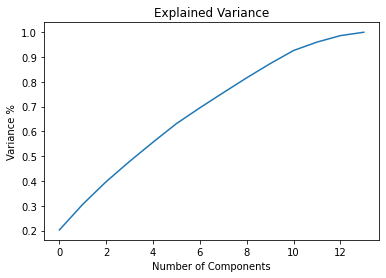

In [165]:
pca = PCA()
principleComponents = pca.fit_transform(x)
print("variance :{}".format(np.sum(pca.explained_variance_ratio_)))
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

13 components explain around 99% variance in Data

## SelectKBest method

In [166]:
best_fit = SelectKBest(score_func = f_classif, k ='all')
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [167]:
fit = best_fit.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(14,'Score'))

             Feature       Score
4        Total_Stops  365.855953
3              Route  261.531986
1             Source  185.054964
2        Destination  111.503716
0            Airline   79.367198
12    Duration_Hours   38.143771
5    Additional_Info   25.702950
10      Arrival_Hour    4.814361
7     Day_of_Journey    4.135897
9         Dep_Minute    3.775074
11    Arrival_Minute    3.523219
13  Duration_Minutes    3.300558
8           Dep_Hour    3.052420
6   Month_of_Journey    2.944580


##### Selecting the best features based on above scores, we can see that the column "Month_of_Journey" has most lowest features for the prediction, so we will drop this column.

In [168]:
x = x.drop([ "Month_of_Journey"],axis=1)

In [169]:
x.shape

(10616, 13)

In [170]:
x.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,-0.416389,-1.654961,2.412958,-1.543901,1.402261,0.331578,1.179733,1.545322,-0.235793,-1.788986,-0.889164,-1.172623,1.274332
1,-1.267036,0.888086,-0.972978,0.254569,-0.253869,0.331578,-0.826591,-1.364302,1.362831,-0.049155,-0.586436,-0.047501,-0.201076
2,0.008934,0.040404,-0.295791,1.181053,-0.253869,0.331578,-0.603889,-0.558956,0.030644,-1.357355,0.019020,1.097592,-1.676483
3,-0.416389,0.888086,-0.972978,0.445315,-0.805912,0.331578,-0.826591,0.950912,-1.035105,1.415258,0.321749,-0.387900,-0.201076
4,-0.416389,-1.654961,2.412958,-1.244156,-0.805912,0.331578,-1.419477,0.639248,1.362831,1.121763,0.624477,-0.599096,0.979250


##### Now, we have completed features selection process through using 2 techniques. So, will check for multicolinearity now.

## Checking for Multicolinearity
### VIF (Variance Inflation factor)

In [171]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.046550,Airline
1,1.665500,Source
2,1.856771,Destination
3,1.629657,Route
4,3.027181,Total_Stops
5,1.113024,Additional_Info
6,1.032439,Day_of_Journey
7,1.032882,Dep_Hour
8,1.035012,Dep_Minute
9,1.048995,Arrival_Hour


#### No Multi-collinearaity is present in columns. So, we will create model now.

# Creating Model

In [172]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8105335833216386 on random_state: 69


## Creating train-test-split

In [173]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 28)

#### As target column contains continuous data , so we have to understand this by Regression problem

# Regression Algorithms

## Linear Regression

In [174]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.4334518651746324
Mean abs error: 2446.4001071602593
Mean squared error: 12659303.030042322


### Checking the performance of the model by graph

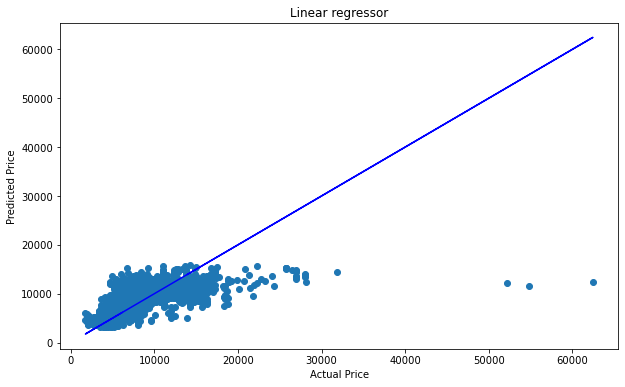

In [175]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear regressor")
plt.show()

## Random forest Regression Model

In [176]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=28)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.8426379525452011
Mean abs error: 894.3947763587892
Mean squared error: 3516195.221033144


### Checking the performance of the model by graph

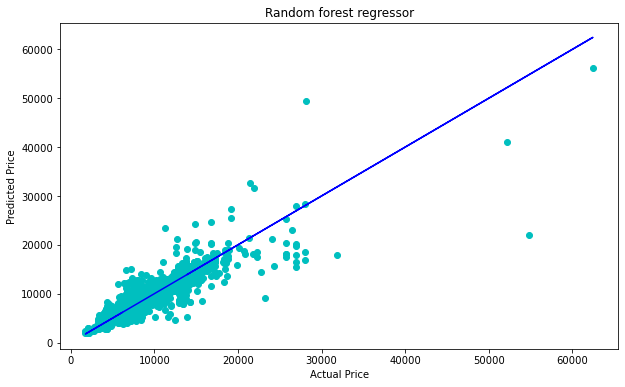

In [177]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random forest regressor")
plt.show()

## KNN Regressor

In [178]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.7108875841193729
Mean abs error: 1414.3431680267838
Mean squared error: 6460107.195496501


### Checking the performance of the model by graph

Text(0.5, 1.0, 'K-nearest neighbors  regressor')

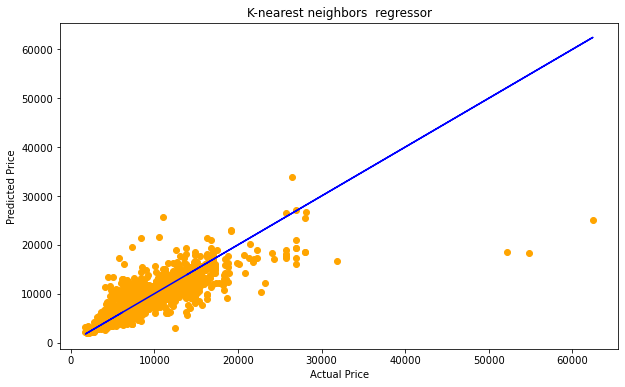

In [179]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("K-nearest neighbors  regressor")

## Support Vector Regression Model

In [180]:
# Checking R2 score for svr
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)

#prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))

R2_Score: 0.3595515656745073
Mean abs error: 2460.1448569451336
Mean squared error: 14310577.172302688


### Checking the performance of the model by graph

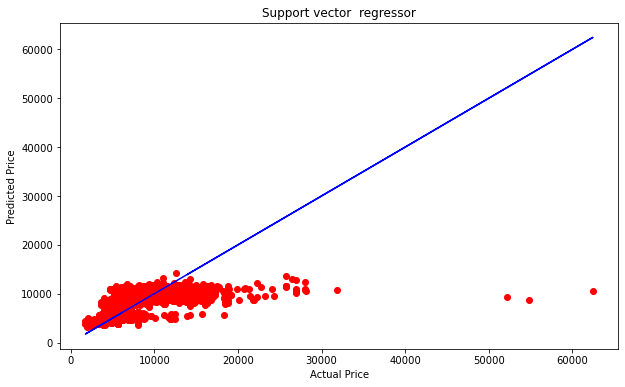

In [181]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predsv,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Support vector  regressor")
plt.show()

## Grdient boosting Regressor

In [182]:
# Checking R2 score for GBR
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=29, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))

R2_Score: 0.8405340586999934
Mean abs error: 1144.830994909065
Mean squared error: 3563205.930436919


### Checking the performance of the model by graph

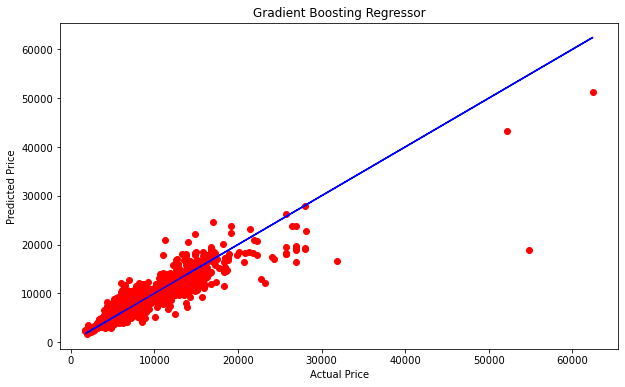

In [183]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting Regressor")
plt.show()

## Decision Tree Regressor

In [184]:
# Checking R2 score for GBR
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)

#prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))

R2_Score: 0.7029922938209766
Mean abs error: 1008.5117467043316
Mean squared error: 6636524.460427325


### Checking the performance of the model by graph

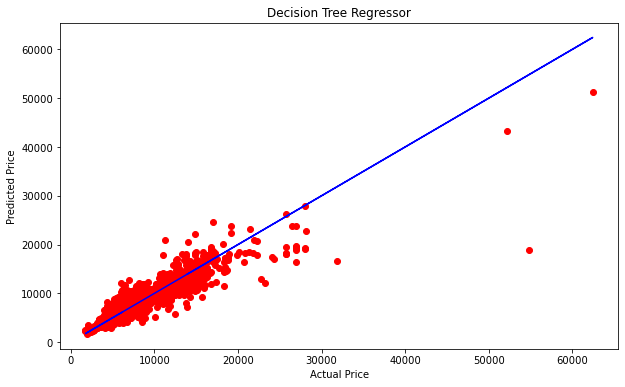

In [185]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regressor")
plt.show()

## Cross Validation Score for all the model

In [186]:
#CV Score for Linear Regression
print('CV score for Linear Regression: ',cross_val_score(LR,x,y,cv=5).mean())

#CV Score for Random Forest Regression
print('CV score for Random forest Regression: ',cross_val_score(RFR,x,y,cv=5).mean())

#CV Score for KNN Regression
print('CV score for KNN Regression: ',cross_val_score(knn,x,y,cv=5).mean())

#CV Score for Support Vector Regression
print('CV score for Support Vector  Regression: ',cross_val_score(sv,x,y,cv=5).mean())

#CV Score for Gradient Boosting Regression
print('CV score for Gradient Boosting Regression: ',cross_val_score(Gb,x,y,cv=5).mean())

#CV Score for Decision Tree Regression
print('CV score for Decision Tree Regression: ',cross_val_score(DTR,x,y,cv=5).mean())

CV score for Linear Regression:  0.4342209663012865
CV score for Random forest Regression:  0.811460668259515
CV score for KNN Regression:  0.7092838853238757
CV score for Support Vector  Regression:  0.37454486857278646
CV score for Gradient Boosting Regression:  0.8279876493297822
CV score for Decision Tree Regression:  0.7391050737081927


##### So accroding to the Cross validation score of all the model we can see that the best cv score is here is for the gradient boosting regressor

# Hyper Parameter Tuning

## The Gradient boosting regressor with GridsearchCV

In [187]:
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [188]:
CV_GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)

In [189]:
CV_GBR.fit(x_train,y_train)

Fitting 6 folds for each of 1280 candidates, totalling 7680 fits


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [190]:
CV_GBR.best_params_

{'alpha': 0.001,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 400,
 'subsample': 1}

### Creating Final Regressor Model

In [191]:
GBR = GradientBoostingRegressor(n_estimators=400,alpha=0.001,learning_rate= 0.01, max_depth= 3, subsample = 1)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, learning_rate=0.01, n_estimators=400,
                          subsample=1)

In [192]:
#prediction
GBRpred = GBR.predict(x_test)
#R2 score
acc = r2_score(y_test,GBRpred)
print(acc*100)

73.09581780113378


#### So after the Hypertuning now we have got a descent accuracy score of 73% on Gradient boosting

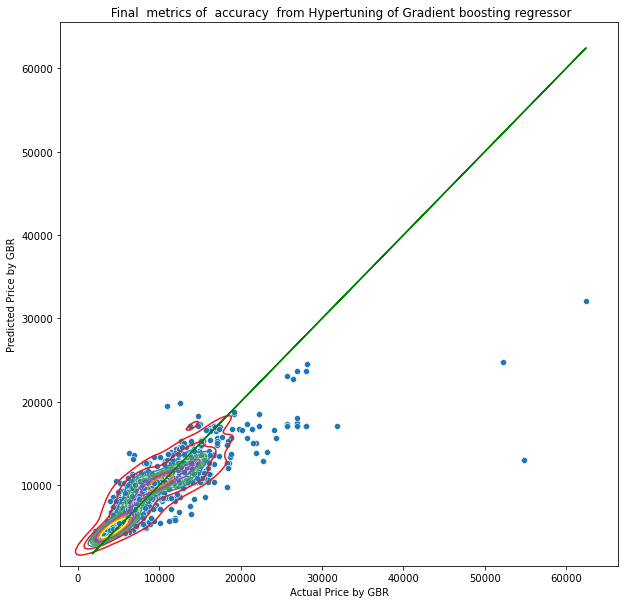

In [193]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=GBRpred,palette='Set2')
sns.kdeplot(x=y_test,y=GBRpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Price by GBR")
plt.ylabel("Predicted Price by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

In [194]:
#lets transform flight_test Dataset according to pca
x_pca_test=pca.transform(flight_test)

## Saving The Predictive Model

In [195]:
#saving the model at local file system
filename='Flight_Price_Prediction.pickle'
pickle.dump(CV_GBR,open(filename,'wb'))
#prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([ 5274.28694206,  4404.36261625,  9438.87324497, ...,
       14242.13540397,  4673.38282834, 11366.5928738 ])

### Checking predicted and original values

In [196]:
import numpy as np
a = np.array(y_test)
predicted = np.array(GBR.predict(x_test))
Flight_Price_Prediction = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Flight_Price_Prediction

,Original,Predicted
0,6151,7532.536442
1,4990,4560.534868
2,6315,13913.128059
3,9646,10226.818697
4,8016,7575.719187
...,...,...
2119,4332,4797.806050
2120,4256,6370.151810
2121,14781,12581.754405
2122,4823,4734.276372


### Let's plot and visualize

Text(0.5, 1.0, 'Original vs predicted  graph')

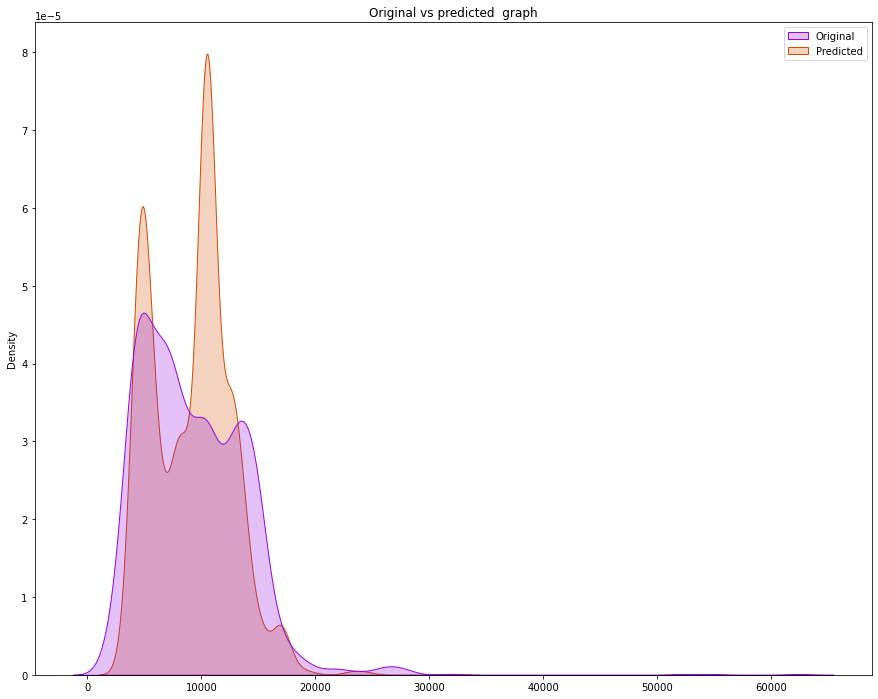

In [197]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=Flight_Price_Prediction, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

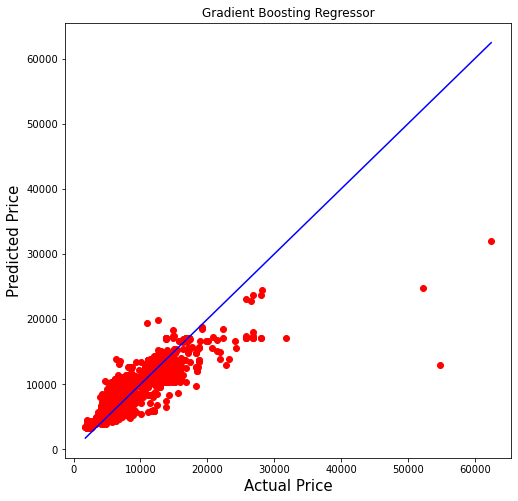

In [200]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predicted,c='r')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.title("Gradient Boosting Regressor")
plt.show()

#### Saving the model in CSV format

In [199]:
model =Flight_Price_Prediction.to_csv('Flight_Price_Prediction.csv')
model